<font color=darkcyan>
<font size =5>
Problem Definition

<font color= black>
<font size =2.5>
    
In recent times, due to the increased price of new cars and the incapability of customers to buy new cars due to the lack of funds, used cars sales are on a global increase. The prices of new cars in the industry is fixed by OEMs except for dealership level discounts and Goverment taxes. Unlike new cars, used cars are very different with huge uncertainty in both pricing and supply. Hence, there is a need for a used car price prediction system to effectively determine the worthiness of the car using a variety of features. This type of effective predictive model is important in order to grow in the market.
    
For a startup business in Used cars, we have to come up with a pricing model that can effectively predict the price of used cars and can help the business in devising profitable strategies using differential pricing.
    

<font color=darkcyan>
<font size =5>
Goals

<font color=black>
<font size =2.5>
        
1. Identifing the trends in the sales of cars and car industry in general.
2. Correlation between price and car features, along with year, location of car, vehicle mileage, etc.
3. Identifying highly correlated variables.
3. Prediction of a used car’s price given its specifications using Linear Regression Model.
4. Generating insights which will help the business grow.
 

<font color=darkcyan>
<font size =5>
1.1 Loading all required libraries

In [1]:
# Importing required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
from sklearn.model_selection import train_test_split

%matplotlib inline
sns.set()

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# To build linear regression model for prediction
from sklearn.linear_model import LinearRegression

# To check model performance
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

<font color=darkcyan>
<font size =5>
1.2 Importing the Data Set

In [2]:
data = pd.read_csv('used_cars_data.csv') 

In [3]:
pd.read_csv('used_cars_data.csv') 

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN


<font color=darkblue>
<font size =2>
# Observations : 
The dataset given used_cars_data.csv file has been succefully imported.

In [4]:
cars = data.copy()

<font color=darkcyan>
<font size =5>
1.3 Structural Overview of the Data Set


<font color=darkorange>
<font size =4.5>
1.3.1 Viewing the first 5 and last 5 rows of the Data Set

In [5]:
cars.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [6]:
cars.tail()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7252,7252,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Kochi,2014,72443,Diesel,Automatic,First,10.0 kmpl,2148 CC,170 bhp,5.0,NaN,NaN


<font color=darkblue>
<font size =2>
# Observations : 
The dataset looks clean and consistent with the description provided.

<font color=darkorange>
<font size =4.5>
1.3.2 Data columns of the given Used cars Data Set

In [7]:
cars.columns

Index(['S.No.', 'Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price'],
      dtype='object')

<font color=darkblue>
<font size =2>
# Observations : 
The dataset consists of the above 14 columns.

<font color=darkorange>
<font size =4.5>
1.3.3 Checking the data shape

In [8]:
cars.shape

(7253, 14)

<font color=darkblue>
<font size =2>
# Observations : 
We have 7253 rows and 14 columns

<font color=darkorange>
<font size =4.5>
1.3.4 Checking the detailed information of the columns like data type, count, etc.

In [9]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


<font color=darkblue>
<font size =2>
# Observations 


<font color = 'darkblue'>

1. Name, Location,  Fuel_Type, Transmission, Owner_Type, Mileage, Engine, Power and New_Price is object data type.
2. Seats and Price are float type
3. All the other variables S.No., Year and Kilometer_Driven are integer values.
4. As we can see from the above data Mileage kmpl , Engine cc, power bhp and New_Price columns would be better as numeraical values.
5. Also Year would be better as a categorical variable. 
6. S.No. column is redundant, hence can be dropped.
7. Converting "objects" to "category" reduces the data space required to store the dataframe. Name , Location, Fuel_Type, Transmission, Owner_Type can we converted to categories.
8. Number of seats can be an integer instead of float variable.

<font color=darkcyan>
<font size =5>
1.4 Fixing The Data Types

<font color=darkorange>
<font size =4.5>
1.4.1 Changing object type variable to categories

In [10]:
# Changing Type of the object columns to category
cars["Name"]=cars["Name"].astype("category")
cars["Location"]=cars["Location"].astype("category")
cars["Fuel_Type"]=cars["Fuel_Type"].astype("category")
cars["Transmission"]=cars["Transmission"].astype("category")
cars["Owner_Type"]=cars["Owner_Type"].astype("category")

In [11]:
# Verifying data type change
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   S.No.              7253 non-null   int64   
 1   Name               7253 non-null   category
 2   Location           7253 non-null   category
 3   Year               7253 non-null   int64   
 4   Kilometers_Driven  7253 non-null   int64   
 5   Fuel_Type          7253 non-null   category
 6   Transmission       7253 non-null   category
 7   Owner_Type         7253 non-null   category
 8   Mileage            7251 non-null   object  
 9   Engine             7207 non-null   object  
 10  Power              7207 non-null   object  
 11  Seats              7200 non-null   float64 
 12  New_Price          1006 non-null   object  
 13  Price              6019 non-null   float64 
dtypes: category(5), float64(2), int64(3), object(4)
memory usage: 649.4+ KB


<font color=darkblue>
<font size =2>
# Observations : 
We have reduced memory usage from 793.4 KB to 649.4 KB

<font color=darkorange>
<font size =4.5>
1.4.2 Converting data types to numerical

In [12]:
# Removing string from the following columns
cars["Mileage"]= cars["Mileage"].str.split(" ", n = 1, expand = True) # Remove Kmpl from Mileage
cars["Engine"]= cars["Engine"].str.split(" ", n = 1, expand = True) # Remove cc from Engine
cars["Power"]= cars["Power"].str.split(" ", n = 1, expand = True)# Remove bhp from Power
cars["New_Price"]= cars["New_Price"].str.split(" ", n = 1, expand = True)# Remove Lakhs from New_Price
cars.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6,998,58.16,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2,1199,88.7,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,1968,140.8,5.0,NaN,17.74


<font color=darkblue>
<font size =2>
# Observations : 
Mileage, Engine CC and Power are now converted to numerical value. Hence we can change their varaiable type to float.

In [13]:
# Changing Type of the following object columns to float type
cars['Mileage'] = cars['Mileage'].astype('float64')
cars['Engine'] = cars['Engine'].astype('float64')
cars['New_Price'] = cars['New_Price'].astype('float64')
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   S.No.              7253 non-null   int64   
 1   Name               7253 non-null   category
 2   Location           7253 non-null   category
 3   Year               7253 non-null   int64   
 4   Kilometers_Driven  7253 non-null   int64   
 5   Fuel_Type          7253 non-null   category
 6   Transmission       7253 non-null   category
 7   Owner_Type         7253 non-null   category
 8   Mileage            7251 non-null   float64 
 9   Engine             7207 non-null   float64 
 10  Power              7207 non-null   object  
 11  Seats              7200 non-null   float64 
 12  New_Price          1006 non-null   float64 
 13  Price              6019 non-null   float64 
dtypes: category(5), float64(5), int64(3), object(1)
memory usage: 649.4+ KB


<font color=darkblue>
<font size =2>
# Observations : 
Mileage, Engine CC and New_Price columns are now converted to float variable. Power column has some null values as string , that is giving an error when converting to a float variable. We will address this later during data pre processing.

<font color=darkorange>
<font size =4.5>
1.4.3 Converting Year column to categorical variable

In [14]:
# Changing Type of the Year columns to category
cars['Year'] = cars['Year'].astype('category')
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   S.No.              7253 non-null   int64   
 1   Name               7253 non-null   category
 2   Location           7253 non-null   category
 3   Year               7253 non-null   category
 4   Kilometers_Driven  7253 non-null   int64   
 5   Fuel_Type          7253 non-null   category
 6   Transmission       7253 non-null   category
 7   Owner_Type         7253 non-null   category
 8   Mileage            7251 non-null   float64 
 9   Engine             7207 non-null   float64 
 10  Power              7207 non-null   object  
 11  Seats              7200 non-null   float64 
 12  New_Price          1006 non-null   float64 
 13  Price              6019 non-null   float64 
dtypes: category(6), float64(5), int64(2), object(1)
memory usage: 600.6+ KB


<font color=darkblue>
<font size =2>
# Observations : 
Year column is now a categorical variable.

<font color=darkorange>
<font size =4.5>
1.4.4 Removing redundant column "S.No."

In [15]:
# Drpo S.No. column
cars.drop(["S.No."], axis=1, inplace=True)
cars.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.2,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.7,5.0,8.61,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.8,5.0,NaN,17.74


<font color=darkblue>
<font size =2>
# Observations : 
We now have a total of 13 columns.

<font color=darkorange>
<font size =4.5>
1.4.5 Handle null values in Power column

In [16]:
# Replace null values in Power column to NaN
cars['Power'] = cars['Power'].str.replace('null', 'NaN')

In [17]:
# Change Power type From object to float type 
cars['Power'] = cars['Power'].astype('float64')
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Name               7253 non-null   category
 1   Location           7253 non-null   category
 2   Year               7253 non-null   category
 3   Kilometers_Driven  7253 non-null   int64   
 4   Fuel_Type          7253 non-null   category
 5   Transmission       7253 non-null   category
 6   Owner_Type         7253 non-null   category
 7   Mileage            7251 non-null   float64 
 8   Engine             7207 non-null   float64 
 9   Power              7078 non-null   float64 
 10  Seats              7200 non-null   float64 
 11  New_Price          1006 non-null   float64 
 12  Price              6019 non-null   float64 
dtypes: category(6), float64(6), int64(1)
memory usage: 544.0 KB


<font color=darkblue>
<font size =2>
# Observations : 
Power column is now float type

<font color=darkcyan>
<font size =5>
1.5 Calculating the statistical data for the given data frame

In [18]:
# Summarize the data using describe.
cars.describe().T

,count,mean,std,min,25%,50%,75%,max
Kilometers_Driven,7253.0,58699.063146,84427.720583,171.00,34000.000,53416.00,73000.00,6500000.00
Mileage,7251.0,18.141580,4.562197,0.00,15.170,18.16,21.10,33.54
Engine,7207.0,1616.573470,595.285137,72.00,1198.000,1493.00,1968.00,5998.00
Power,7078.0,112.765214,53.493553,34.20,75.000,94.00,138.10,616.00
Seats,7200.0,5.279722,0.811660,0.00,5.000,5.00,5.00,10.00
New_Price,1006.0,19.894324,19.813947,1.00,7.635,11.27,23.64,99.92
Price,6019.0,9.479468,11.187917,0.44,3.500,5.64,9.95,160.00


In [19]:
cars.describe()

,Kilometers_Driven,Mileage,Engine,Power,Seats,New_Price,Price
count,7.253000e+03,7251.000000,7207.000000,7078.000000,7200.000000,1006.000000,6019.000000
mean,5.869906e+04,18.141580,1616.573470,112.765214,5.279722,19.894324,9.479468
std,8.442772e+04,4.562197,595.285137,53.493553,0.811660,19.813947,11.187917
min,1.710000e+02,0.000000,72.000000,34.200000,0.000000,1.000000,0.440000
25%,3.400000e+04,15.170000,1198.000000,75.000000,5.000000,7.635000,3.500000
50%,5.341600e+04,18.160000,1493.000000,94.000000,5.000000,11.270000,5.640000
75%,7.300000e+04,21.100000,1968.000000,138.100000,5.000000,23.640000,9.950000
max,6.500000e+06,33.540000,5998.000000,616.000000,10.000000,99.920000,160.000000


<font color=darkblue>
<font size =2>
# Observations 


<font color = 'darkblue'>

1. Some of the columns Engine(cc), Power(bhp), Kilomoters_Driven are skewed.
2. Kilometers driven by each used car has a very large range variation ranging fro 171km to 6500k km. 
3. The range variation in Engine and power also is very large.
4. New_Price column has mostly missing values, hence cannot be a reliable variable for further Data Analysis


In [20]:
#Datatypes count for the given data set
cars.dtypes.value_counts()

float64     6
int64       1
category    1
category    1
category    1
category    1
category    1
category    1
dtype: int64

In [21]:
# filtering non-numeric columns
cat_columns = cars.select_dtypes(exclude=np.number).columns
cat_columns

Index(['Name', 'Location', 'Year', 'Fuel_Type', 'Transmission', 'Owner_Type'], dtype='object')

<font color=darkcyan>
<font size =5>
1.6 Separating Make and Model from Name column

In [22]:
cars['Name'].unique() # Listing unique car names.

['Maruti Wagon R LXI CNG', 'Hyundai Creta 1.6 CRDi SX Option', 'Honda Jazz V', 'Maruti Ertiga VDI', 'Audi A4 New 2.0 TDI Multitronic', ..., 'Skoda Superb Petrol Ambition', 'Tata Tiago 1.05 Revotorq XT Option', 'Ford EcoSport 1.5 Petrol Ambiente', 'Jeep Compass 1.4 Sport', 'Hyundai Elite i20 Magna Plus']
Length: 2041
Categories (2041, object): ['Maruti Wagon R LXI CNG', 'Hyundai Creta 1.6 CRDi SX Option', 'Honda Jazz V', 'Maruti Ertiga VDI', ..., 'Tata Tiago 1.05 Revotorq XT Option', 'Ford EcoSport 1.5 Petrol Ambiente', 'Jeep Compass 1.4 Sport', 'Hyundai Elite i20 Magna Plus']

In [23]:
# Separating the Make and Model from Name column
cars ['Name'] = cars['Name'].str.replace(' ', ',', 1) 
cars["Name"]= cars["Name"].str.split(" ", n = 1, expand = True) 
cars ['Name'] = cars['Name'].str.replace(',', ' ', 1)
cars[['Make','Model']] = cars.Name.str.split(expand=True)
print(cars['Make'])
print (cars['Model'])

0              Maruti
1             Hyundai
2               Honda
3              Maruti
4                Audi
            ...      
7248       Volkswagen
7249       Volkswagen
7250           Nissan
7251       Volkswagen
7252    Mercedes-Benz
Name: Make, Length: 7253, dtype: object
0         Wagon
1         Creta
2          Jazz
3        Ertiga
4            A4
         ...   
7248      Vento
7249       Polo
7250      Micra
7251       Polo
7252    E-Class
Name: Model, Length: 7253, dtype: object


In [24]:
# Verifying the Make & Model column has been created and its datatype
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Name               7253 non-null   object  
 1   Location           7253 non-null   category
 2   Year               7253 non-null   category
 3   Kilometers_Driven  7253 non-null   int64   
 4   Fuel_Type          7253 non-null   category
 5   Transmission       7253 non-null   category
 6   Owner_Type         7253 non-null   category
 7   Mileage            7251 non-null   float64 
 8   Engine             7207 non-null   float64 
 9   Power              7078 non-null   float64 
 10  Seats              7200 non-null   float64 
 11  New_Price          1006 non-null   float64 
 12  Price              6019 non-null   float64 
 13  Make               7253 non-null   object  
 14  Model              7253 non-null   object  
dtypes: category(5), float64(6), int64(1), object(3)
memory 

<font color=darkblue>
<font size =2>
# Observations : 
We have two new columns now Make and model of the car. As Name column has a same data, we can remove it from analysis.

In [25]:
cars.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Make,Model
0,Maruti Wagon,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75,Maruti,Wagon
1,Hyundai Creta,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50,Hyundai,Creta
2,Honda Jazz,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50,Honda,Jazz
3,Maruti Ertiga,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00,Maruti,Ertiga
4,Audi A4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74,Audi,A4


In [26]:
# Deleting the Name column
cars.drop(["Name"], axis=1, inplace=True)
cars.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Make,Model
0,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75,Maruti,Wagon
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50,Hyundai,Creta
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50,Honda,Jazz
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00,Maruti,Ertiga
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74,Audi,A4


<font color=darkcyan>
<font size =5>
1.7 Univariate Analysis

<font color=darkorange>
<font size =4.5>
1.7.1 Location count histogram

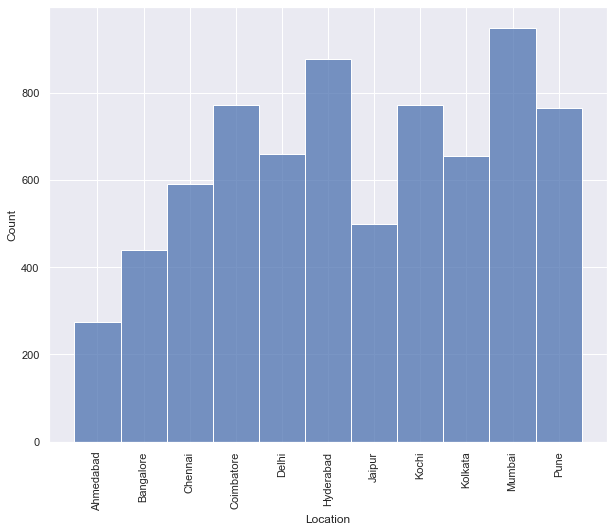

In [27]:
plt.figure(figsize=(10,8)) # Setting the graph size
sns.histplot(cars.Location, kde =False)# Plotting histplot for location
plt.xticks(rotation=90)
None

<font color=darkblue>
<font size =2>
# Observations : 
Mumbai has highest number of used car sales and second highest city in used car sales is Hyderabad, followed by Chennai and Pune. Ahmedabad and Banglore has seen the least used car sales.

<font color=darkorange>
<font size =4.5>
1.7.2 Year histogram

2015    929
2014    925
2016    886
2013    791
2017    709
2012    690
2011    579
2010    407
2018    361
2009    252
2008    207
2007    148
2019    119
2006     89
2005     68
2004     35
2003     20
2002     18
2001      8
2000      5
1998      4
1999      2
1996      1
Name: Year, dtype: int64

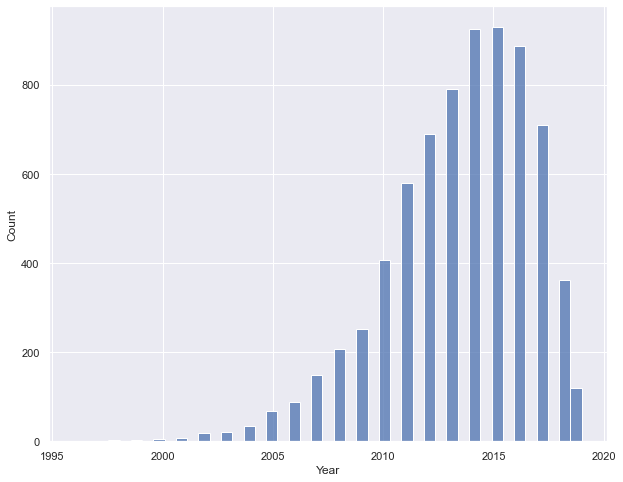

In [28]:
cars['Year'] = cars['Year'].astype('int64')
plt.figure(figsize=(10,8)) # Setting the graph size
sns.histplot(cars.Year, kde =False)#Plotting histogram for Year
cars['Year'].value_counts()# Year wise count

<font color=darkblue>
<font size =2>
# Observations : 


<font color = 'darkblue'>

1. The most used car sold are with manufacturing year 2011 to 2018. With 2015 manufactured cars being the most sold. Hence we can say cars 3-8 years old are most popular in resale. 
2. Cars older than 2009 are not sold much. Resale car buyers donot prefer such old cars.
3. Cars newer than 2019 also have low resale, possibly as there is not much price difference in new car prices and those a year old. 

<font color=darkorange>
<font size =4.5>
1.7.3 Fuel_Type histogram

<AxesSubplot:xlabel='Fuel_Type', ylabel='Count'>

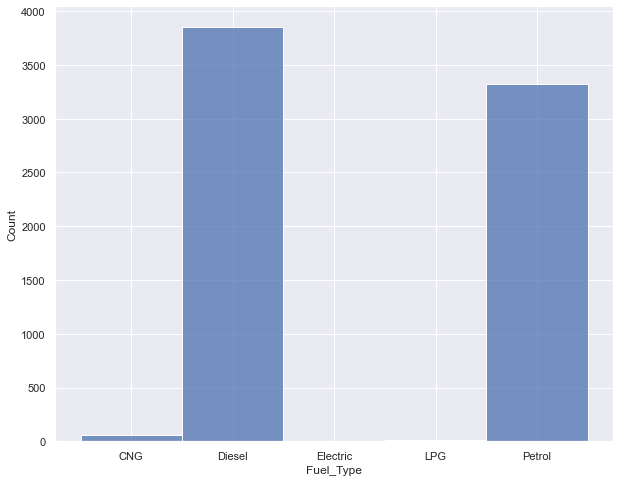

In [29]:
plt.figure(figsize=(10,8)) # Setting the graph size
sns.histplot(cars.Fuel_Type, kde =False)# Plotting histogram for Fuel Type


<font color=darkblue>
<font size =2>
# Observations : 
Diesel cars have more sales than Petrol cars.

<font color=darkorange>
<font size =4.5>
1.7.4 Transmission histogram

<AxesSubplot:xlabel='Transmission', ylabel='Count'>

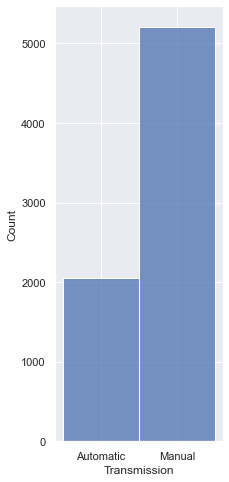

In [30]:
plt.figure(figsize=(3,8)) # Setting the graph size
sns.histplot(cars.Transmission, kde =False)# Plotting histogram for Transmission


<font color=darkblue>
<font size =2>
# Observations : 
Manual cars have more used car sales

<font color=darkorange>
<font size =4.5>
1.7.5 Owner_Type histogram

<AxesSubplot:xlabel='Owner_Type', ylabel='Count'>

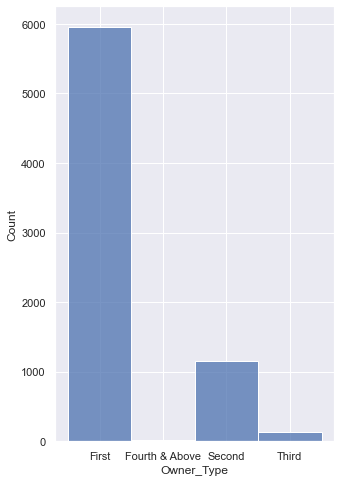

In [31]:
plt.figure(figsize=(5,8)) # Setting the graph size
sns.histplot(cars.Owner_Type, kde =False )# Plotting histogram for Owner Type


<font color=darkblue>
<font size =2>
# Observations : 
First owner cars are more preferred in used car sales

<font color=darkorange>
<font size =4.5>
1.7.6 Price histogram

<AxesSubplot:xlabel='Price', ylabel='Count'>

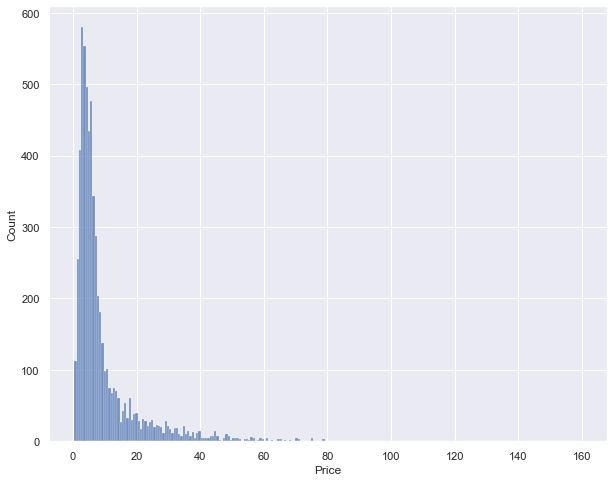

In [32]:
plt.figure(figsize=(10,8)) # Setting the graph size
sns.histplot(cars.Price, kde =False) # Plotting histogram for Price


<font color=darkblue>
<font size =2>
# Observations : 
Price column is mostly right skewed

<font color=darkorange>
<font size =4.5>
1.7.7 "Make" histogram

<AxesSubplot:xlabel='Count', ylabel='Make'>

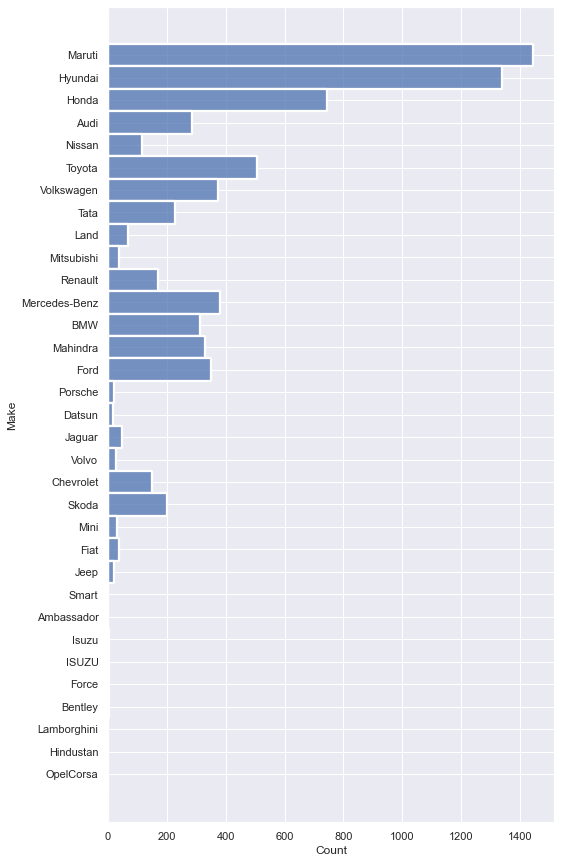

In [33]:
plt.figure(figsize=(8,15)) # Setting the graph size
sns.histplot(data= cars, y="Make", kde =False)# Plotting histogram for Make of car


<font color=darkblue>
<font size =2>
# Observations : 
As seen from above graph brands Maruti,Hyundai, Honda and Toyota have largest used car sales.

<font color=darkorange>
<font size =4.5>
1.7.8 Mileage histogram

17.00    208
18.90    201
18.60    144
21.10    107
20.36    105
        ... 
18.86      1
22.80      1
9.70       1
13.29      1
14.45      1
Name: Mileage, Length: 438, dtype: int64

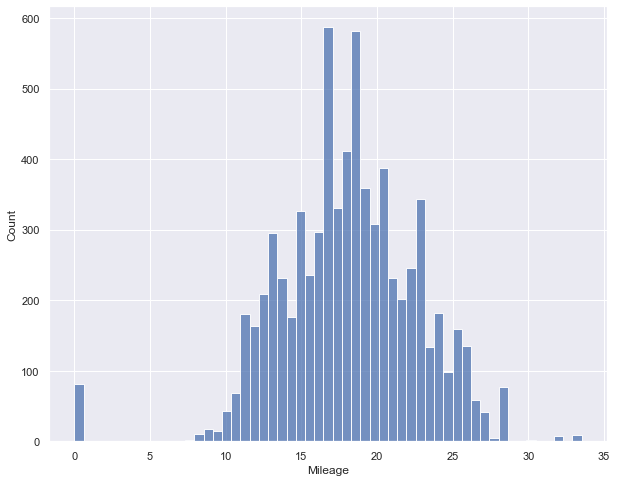

In [34]:
plt.figure(figsize=(10,8)) # Setting the graph size
sns.histplot(cars.Mileage, kde =False)# Plotting histogram for mileage
cars.Mileage.value_counts()

<font color=darkblue>
<font size =2>
# Observations : 
Cars with Mileage 17- 20 kmpl are most popular

<font color=darkorange>
<font size =4.5>
1.7.9 Power histogram

<AxesSubplot:xlabel='Power', ylabel='Count'>

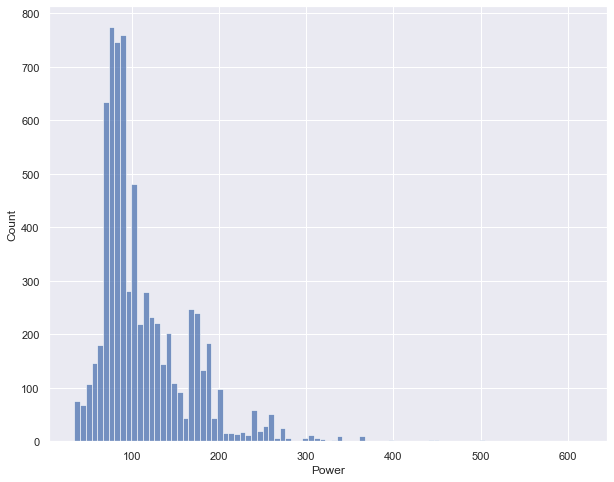

In [35]:
plt.figure(figsize=(10,8)) # Setting the graph size
sns.histplot(cars.Power, kde =False)# Plotting  histogram for power column


<font color=darkblue>
<font size =2>
# Observations : 
Power graph is right skewed. We will handle skewed graph more in detail in data preprocessing.

<font color=darkorange>
<font size =4.5>
1.7.10 Univariate analysis of numerical variables to study their central tendency and dispersion.

In [36]:
# Function to create box plot along with a histogram for univariate analysis
def histogram_boxplot(feature, figsize=(15, 10), bins=None):
    """Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        feature, kde=F, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        feature, kde=False, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        feature.mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        feature.median(), color="black", linestyle="-"
    )  # Add median to the histogram

/Users/swetanaidu/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


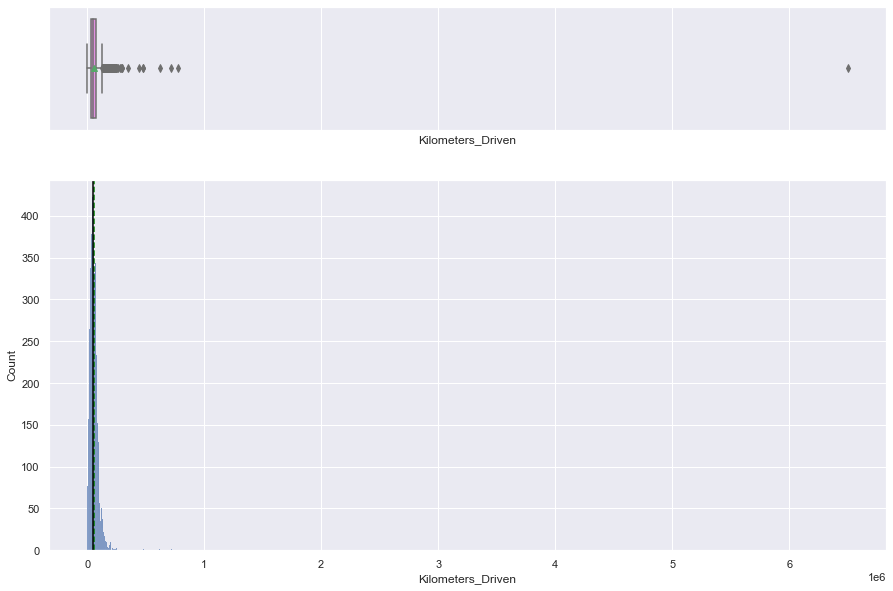

In [37]:
histogram_boxplot(cars["Kilometers_Driven"])

<font color=darkblue>
<font size =2>
# Observations : 
From the above box plot we can see that a single outlier has a largely different value. This need to be further addressed in data pre processing using outlier treatment.

<font color=darkorange>
<font size =4.5>
1.7.11 Engine histogram

/Users/swetanaidu/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


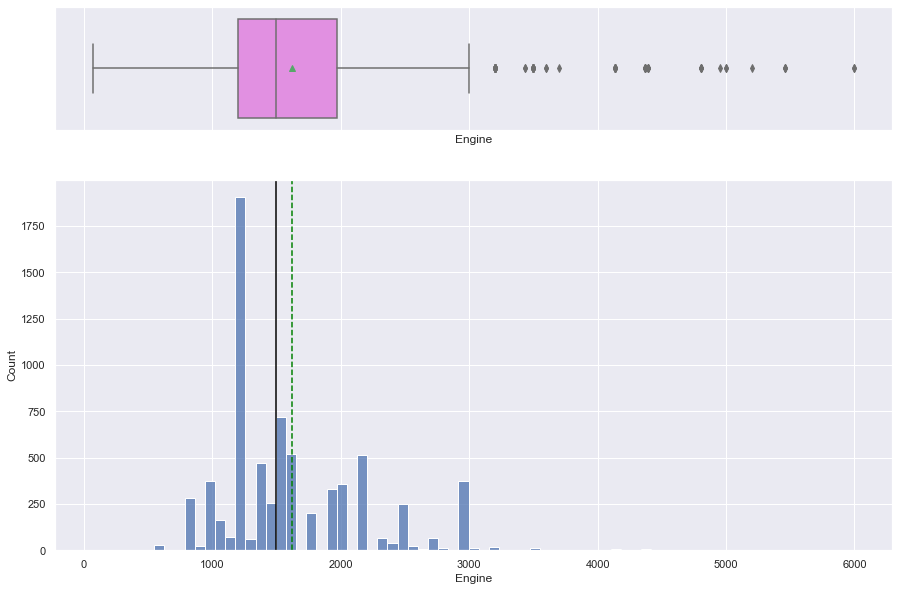

In [38]:
#plt.figure(figsize=(10,8)) # Setting the graph size
#sns.histplot(cars.Engine, kde =False)
histogram_boxplot(cars["Engine"])

<font color=darkblue>
<font size =2>
# Observations : 
Engine power 1190 cc to 1250 cc have largest used car sales.

<font color=darkorange>
<font size =4.5>
1.7.12 Mileage histogram

/Users/swetanaidu/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


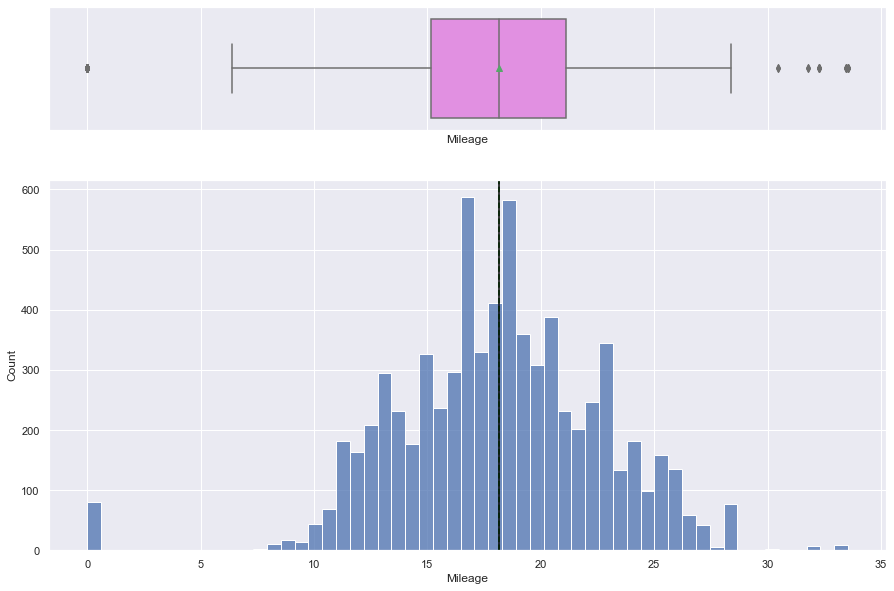

In [39]:
histogram_boxplot(cars["Mileage"])

<font color=darkorange>
<font size =4.5>
1.7.13 Power histogram

/Users/swetanaidu/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


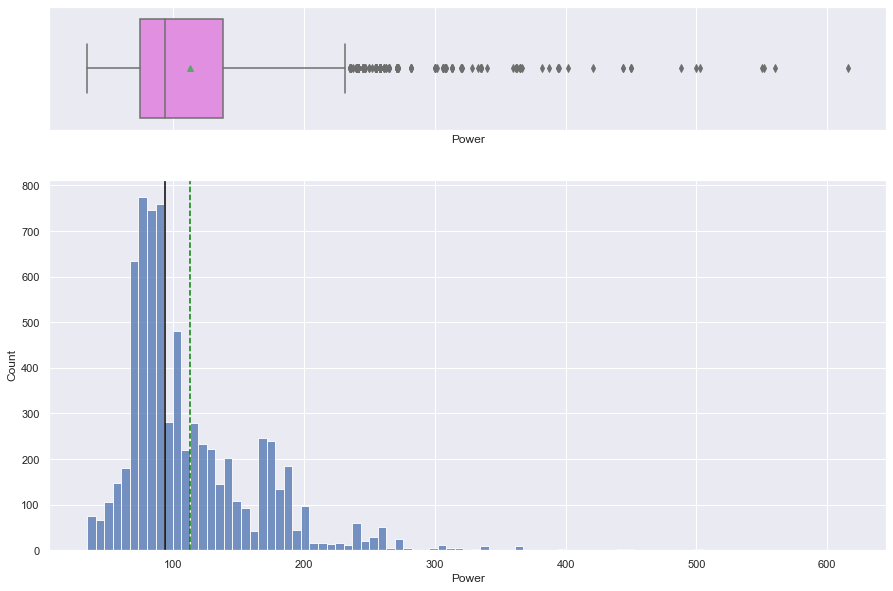

In [40]:
histogram_boxplot(cars["Power"])

<font color=darkorange>
<font size =4.5>
1.7.14 Log Transformation of Power for reducing Skew

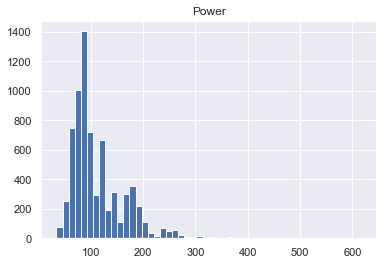

0


In [41]:
cols_to_log = ['Power']
for colname in cols_to_log:
    plt.hist(cars[colname], bins=50)
    plt.title(colname)
    plt.show()
    print(np.sum(cars[colname] <= 0))

In [46]:
cars['Power_log'] = np.log(cars['Power'])

<AxesSubplot:xlabel='Power_log', ylabel='Count'>

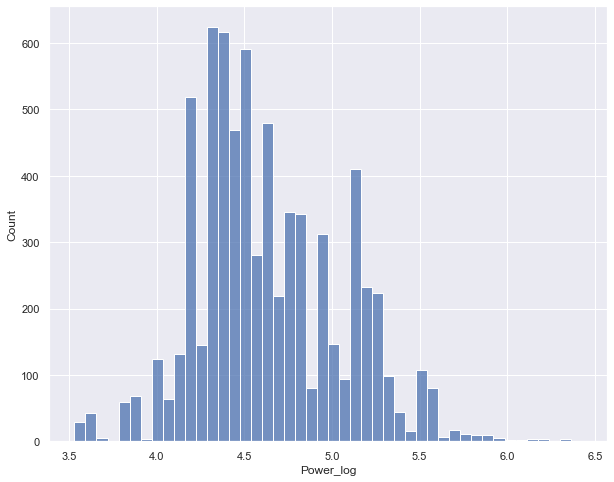

In [47]:
plt.figure(figsize=(10,8)) # Setting the graph size
sns.histplot(cars.Power_log, kde =False)

<font color=darkcyan>
<font size =5>
1.8 Bivariate Analysis

<font color=darkorange>
<font size =4.5>
1.8.1 Pair plots of all numerical data

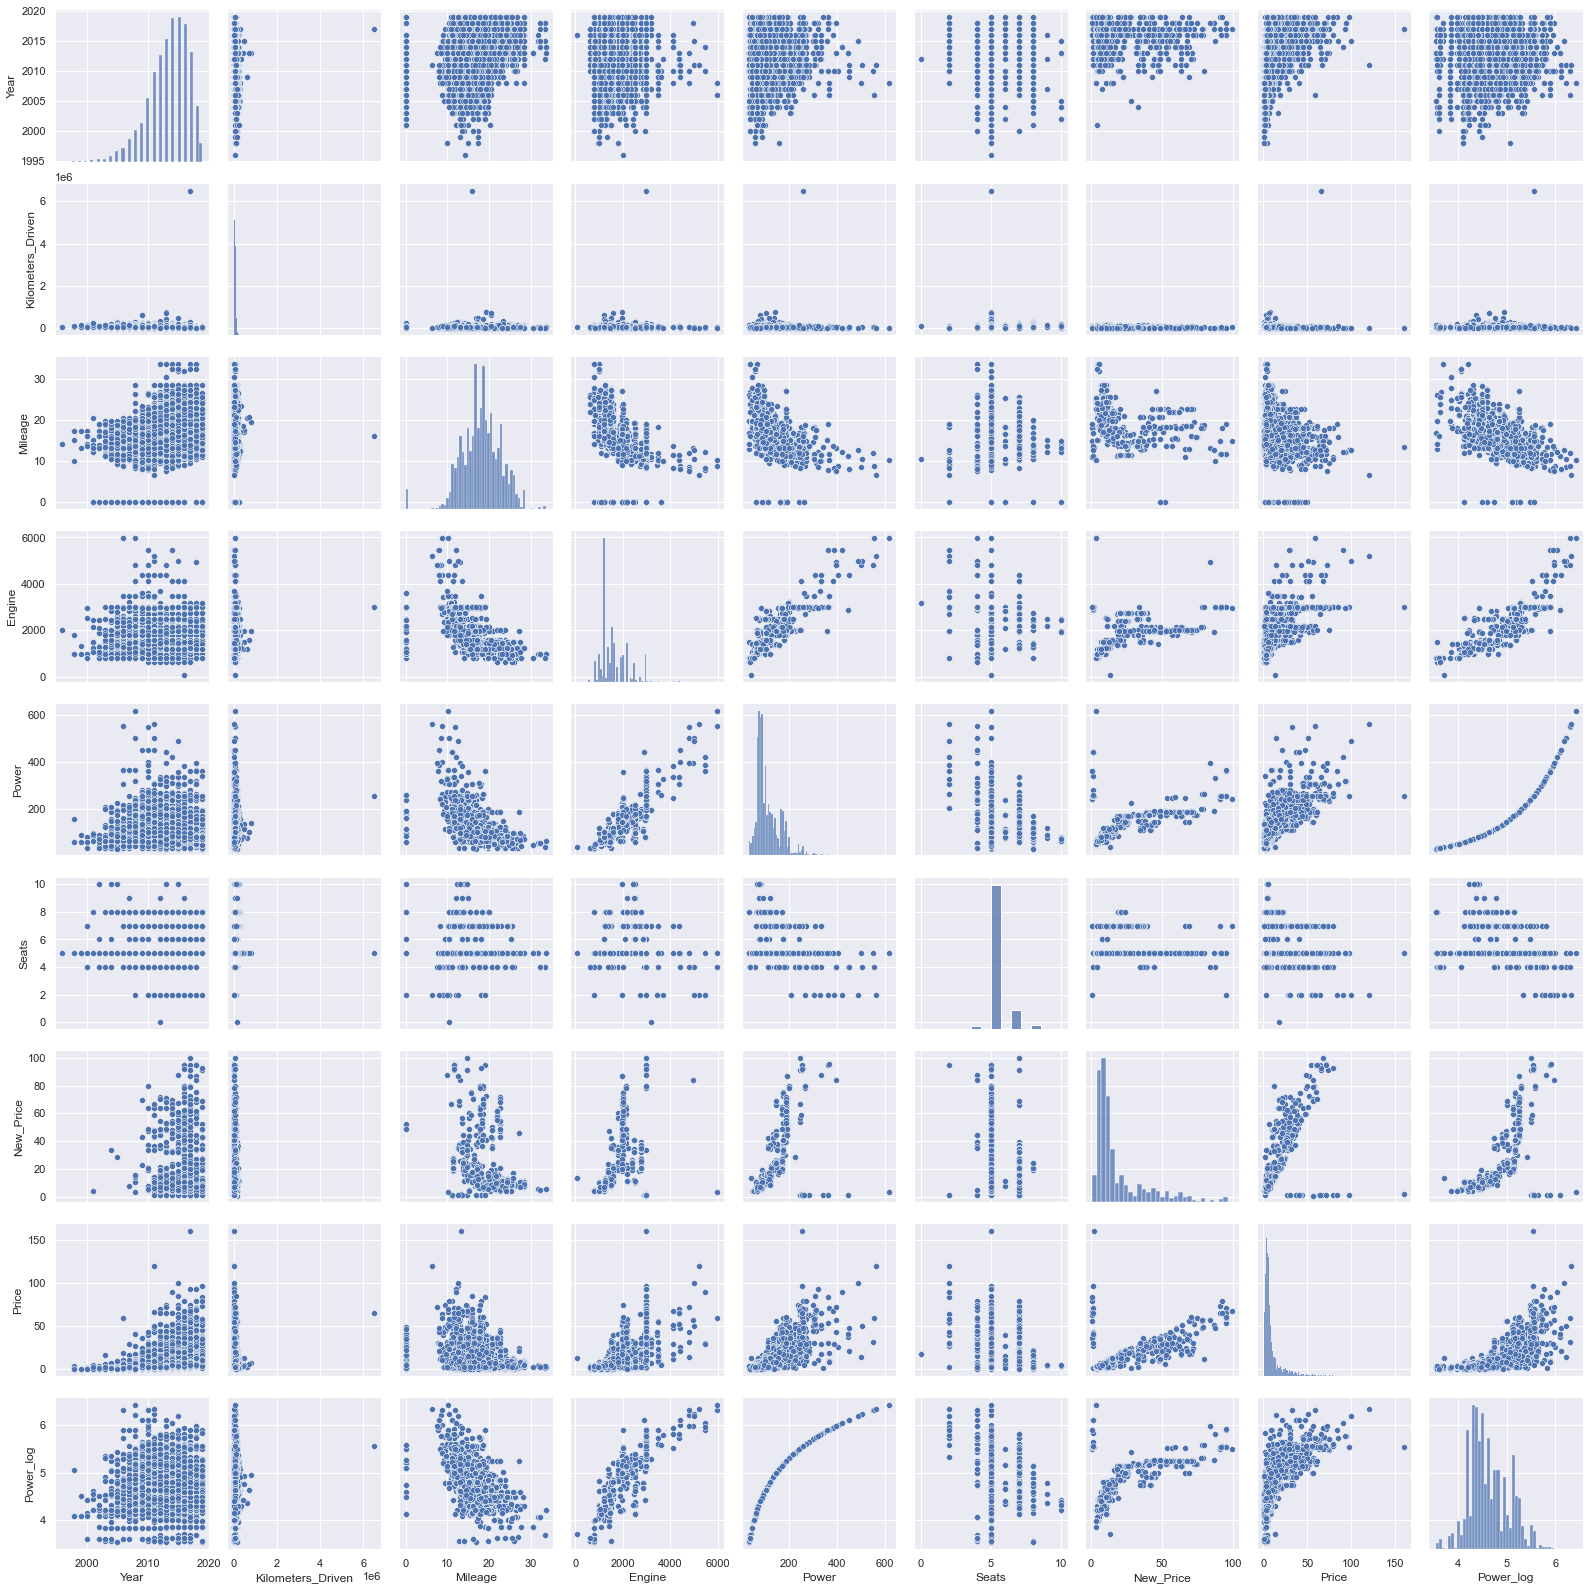

In [48]:
# Plotting pair plots between all numerical columns
sns.pairplot(cars)

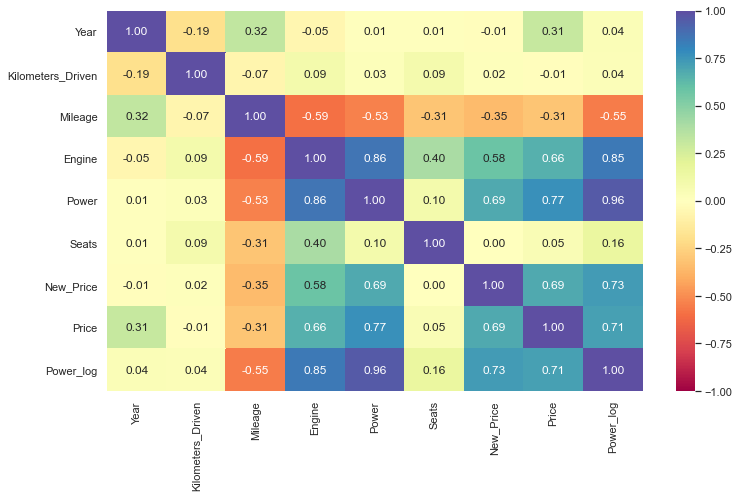

In [49]:
# Plotting a heat map
plt.figure(figsize=(12, 7))
sns.heatmap(
    cars.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()


<font color=darkblue>
<font size =3>
# Observations 

<font color = 'darkblue'>

1. Newer cars sell for more price than older cars.


<font color=darkorange>
<font size =4.5>
1.8.2 Polpularity of car brands based on Location

In [50]:
# Grouping Make and Location by count
f= cars.groupby(['Make','Location']).size().reset_index(name ='count')


In [51]:
# Sorting the result of group by and getting top 5 results
x = f.sort_values(['Location','count'],ascending=False).groupby('Location').head()
print(x)

              Make    Location  count
219         Maruti        Pune    182
131        Hyundai        Pune    133
120          Honda        Pune     79
340         Toyota        Pune     61
351     Volkswagen        Pune     44
218         Maruti      Mumbai    163
130        Hyundai      Mumbai    144
119          Honda      Mumbai    127
339         Toyota      Mumbai     67
229  Mercedes-Benz      Mumbai     64
129        Hyundai     Kolkata    148
217         Maruti     Kolkata    141
118          Honda     Kolkata     85
349     Volkswagen     Kolkata     45
338         Toyota     Kolkata     33
128        Hyundai       Kochi    159
216         Maruti       Kochi    146
117          Honda       Kochi     96
227  Mercedes-Benz       Kochi     43
205       Mahindra       Kochi     39
215         Maruti      Jaipur    138
127        Hyundai      Jaipur    106
116          Honda      Jaipur     46
325           Tata      Jaipur     25
94            Ford      Jaipur     23
214         

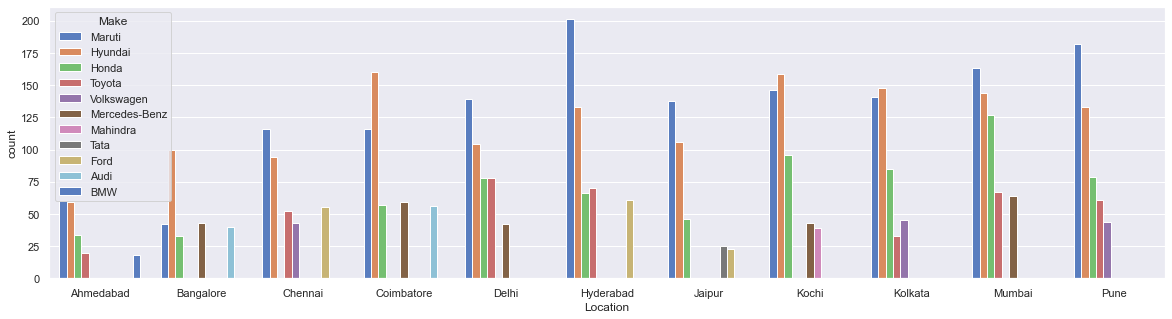

In [52]:
# Plotting Location wise sale of car brands
plt.figure(figsize=(20,5))
sns.barplot(data=x ,x='Location',y='count',hue='Make',palette ='muted')
plt.show()



<font color=darkblue>
<font size =3>
# Observations 

<font color = 'darkblue'>

1. Maruti and Hyundai are the top selling brands in most cities followed by Honda and Toyota in some places.
2. From the above graph we can observe which brands car are more in demand in each city, thereby giving business idea about the demand of used car brands in each city. This will help them determine supply and price.
3.  Used car sales per city by Make are as follows
    
Ahmedabad, Chennai,Coimbatore, Hyderabad , Jaipur and Pune: Maruti and Hyundai are most popular.
    
Mumbai,Kochi and Kolkata : Maruti, Hyundai and Honda
    
Banglore : Hyundai
    
Delhi : Maruti, Hyundai, Honda and Toyota
    

<font color= darkorange >
<font size =4.5>
1.8.3 Correlation between different Make and Price


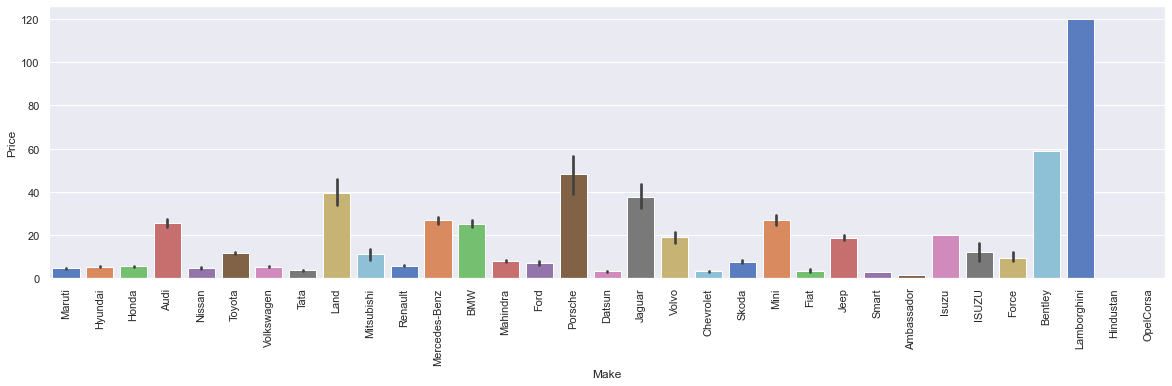

In [53]:
plt.figure(figsize=(20,5))
ax = sns.barplot(x='Make', y='Price', data=cars, palette='muted') 
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
None

<font color= darkorange >
<font size =4.5>
1.8.4 Correlation between different Transmission and Price


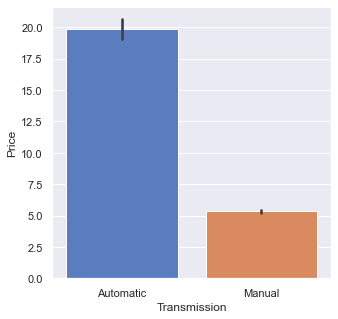

In [54]:
# Graph plotting Price of cars based on transmission

plt.figure(figsize=(5,5))
ax = sns.barplot(x='Transmission', y='Price', data=cars, palette='muted') 


<font color=darkblue>
<font size =2>
# Observations : 
Automatic cars are more expensive as compared to Manual drive cars
    

<font color=darkorange>
<font size =4.5>
1.8.5 Transmission based sale of cars per location

In [55]:
f= cars.groupby(['Transmission','Location']).size().reset_index(name ='count')


In [56]:
x = f.sort_values(['Location','count'],ascending=False).groupby('Location').head()
print(x)

   Transmission    Location  count
21       Manual        Pune    596
10    Automatic        Pune    169
20       Manual      Mumbai    590
9     Automatic      Mumbai    359
19       Manual     Kolkata    566
8     Automatic     Kolkata     88
18       Manual       Kochi    527
7     Automatic       Kochi    245
17       Manual      Jaipur    437
6     Automatic      Jaipur     62
16       Manual   Hyderabad    644
5     Automatic   Hyderabad    232
15       Manual       Delhi    456
4     Automatic       Delhi    204
14       Manual  Coimbatore    469
3     Automatic  Coimbatore    303
13       Manual     Chennai    455
2     Automatic     Chennai    136
12       Manual   Bangalore    261
1     Automatic   Bangalore    179
11       Manual   Ahmedabad    203
0     Automatic   Ahmedabad     72


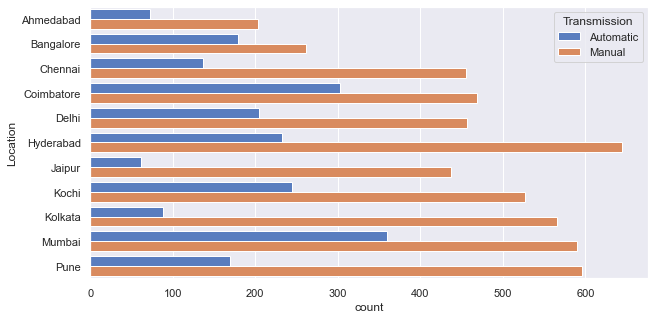

In [57]:
# Plotting graph for car sales city wise based on transmission
plt.figure(figsize=(10,5))
sns.barplot(data=x ,x='count',y='Location',hue='Transmission',palette ='muted')
plt.show()

<font color=darkblue>
<font size =3>
# Observations 

<font color = 'darkblue'>

1. Mostly Manual cars are more popular.
2. But coimbatore, Mumbai and Hyderabad also see high demand in automatic cars.
3. Jaipur and Kolkata have very low Automatic car sales.
4. Used manual cars market is highest in hyderabad.

<font color=darkorange>
<font size =4.5>
1.8.6 Corellation between Kilometeers driven on car and price

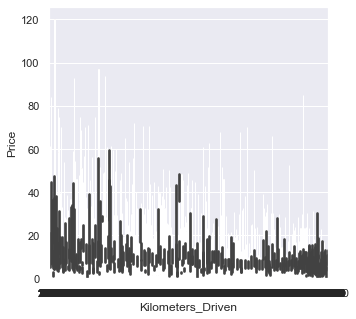

In [58]:
# Graph plotting Price of cars based on Kilometers_Driven

plt.figure(figsize=(5,5))
ax = sns.barplot(x='Kilometers_Driven', y='Price', data=cars, palette='muted') 


<font color=darkblue>
<font size =2>
# Observations : 
Graph too complex to conclude anything use binning to categorize. Binned graph explained in later data pre processing section

<font color=darkorange>
<font size =4.5>
1.8.7 Corellation between Price of car and location

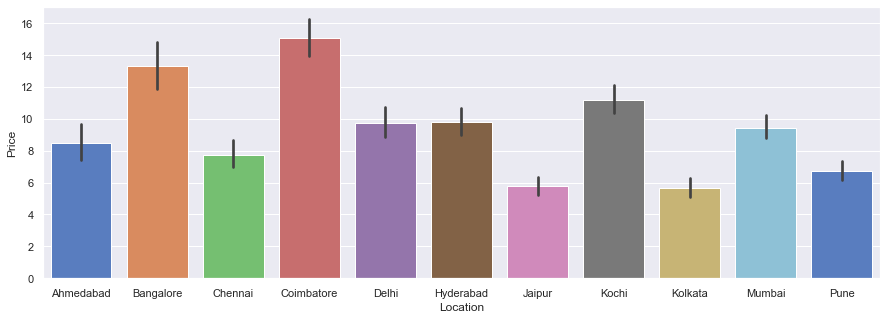

In [59]:
# Graph plotting Price of cars based on Location

plt.figure(figsize=(15,5))
ax = sns.barplot(x='Location', y='Price', data=cars, palette='muted') 


<font color=darkblue>
<font size =2>
# Observations : 
Though most used cars are being sold in Mumbai, Coimbatore and Banglore has most expensive cars being sold

<font color=darkorange>
<font size =4.5>
1.8.8 Corellation between Price of car and year of manufacturing

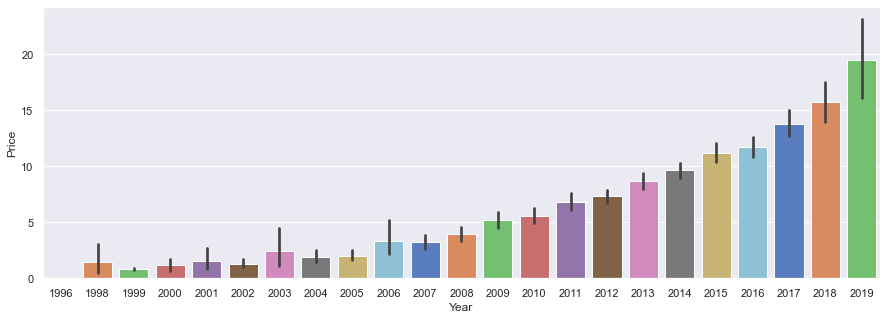

In [60]:
# Graph plotting Price of cars based on Year

plt.figure(figsize=(15,5))
ax = sns.barplot(x='Year', y='Price', data=cars, palette='muted') 


<font color=darkblue>
<font size =2>
# Observations : 
Most recent cars are most high priced.

<font color=darkorange>
<font size =4.5>
1.8.8 Corellation between Make of car and Kilometers Driven

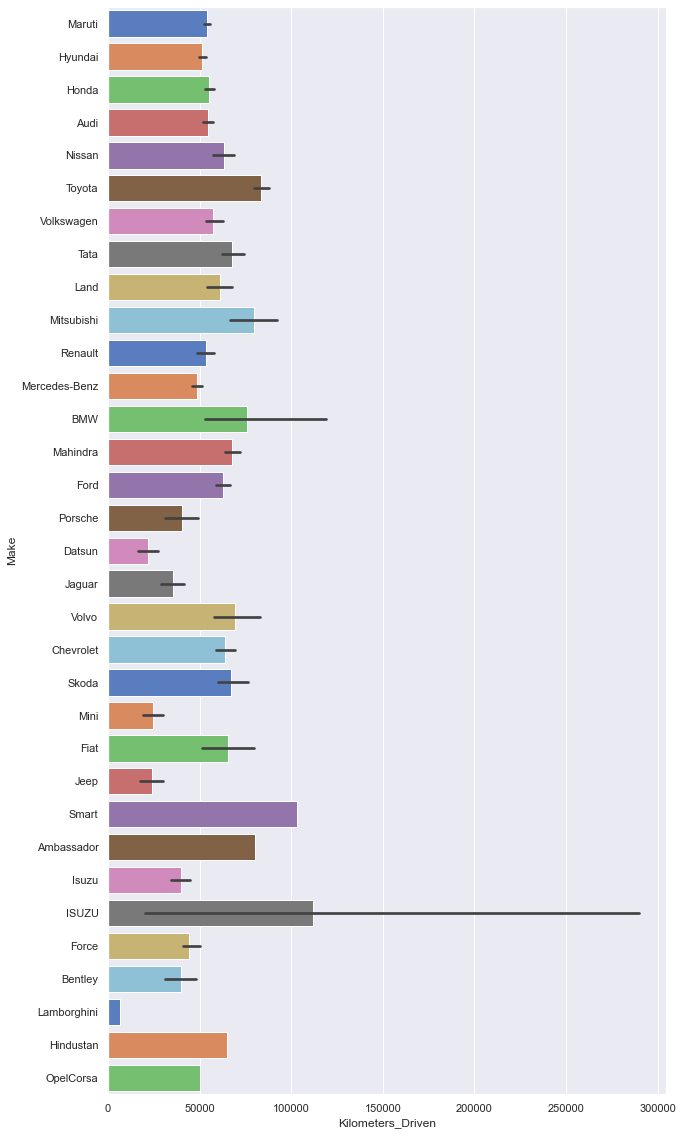

In [61]:
# Graph plotting Price of cars based on Engine

plt.figure(figsize=(10,20))
ax = sns.barplot(x='Kilometers_Driven', y='Make', data=cars, palette='muted') 


<font color=darkblue>
<font size =2>
# Observations : 

    

<font color=darkorange>
<font size =4.5>
1.8.9 Fuel Type based sale of cars per location

In [62]:
f= cars.groupby(['Fuel_Type','Location']).size().reset_index(name ='count')


In [63]:
x = f.sort_values(['Location','count'],ascending=False).groupby('Location').head()
print(x)

   Fuel_Type    Location  count
54    Petrol        Pune    387
21    Diesel        Pune    364
10       CNG        Pune     13
43       LPG        Pune      1
32  Electric        Pune      0
53    Petrol      Mumbai    558
20    Diesel      Mumbai    371
9        CNG      Mumbai     18
31  Electric      Mumbai      1
42       LPG      Mumbai      1
52    Petrol     Kolkata    337
19    Diesel     Kolkata    316
8        CNG     Kolkata      1
30  Electric     Kolkata      0
41       LPG     Kolkata      0
51    Petrol       Kochi    405
18    Diesel       Kochi    358
7        CNG       Kochi      9
29  Electric       Kochi      0
40       LPG       Kochi      0
17    Diesel      Jaipur    276
50    Petrol      Jaipur    219
39       LPG      Jaipur      4
6        CNG      Jaipur      0
28  Electric      Jaipur      0
16    Diesel   Hyderabad    593
49    Petrol   Hyderabad    274
38       LPG   Hyderabad      6
5        CNG   Hyderabad      3
27  Electric   Hyderabad      0
15    Di

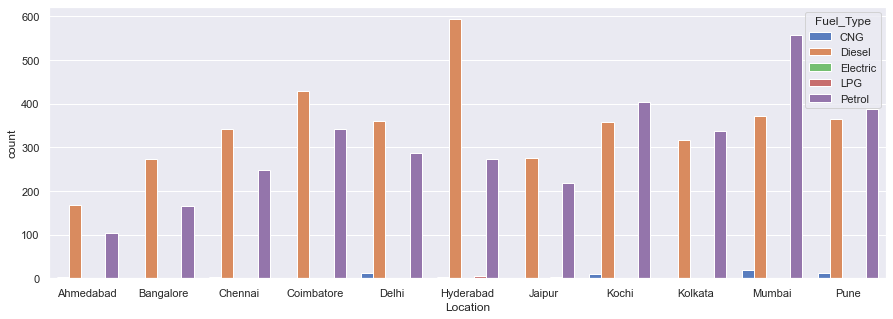

In [64]:
# Plotting graph for car sales city wise based on transmission
plt.figure(figsize=(15,5))
sns.barplot(data=x ,x='Location',y='count',hue='Fuel_Type',palette ='muted')
plt.show()

<font color=darkblue>
<font size =3>
# Observations 

<font color = 'darkblue'>

1.Diesel cars are mostly sold in hyderabad and coimbatore
    
    
2.Petrol cars are more popular in Mumbai and Pune

<font color=darkcyan>
<font size =5>
1.9 Data Pre-Processing

<font color=darkorange>
<font size =4.5>
1.9.1 Data Preparation for Modeling : Binning of Engine cc column

In [65]:
# Engine cc binned for better categorization
binned_cc = pd.cut(cars['Engine'], [-np.inf, 1000, 1400, 1800,2400, np.inf])
binned_cc

0         (-inf, 1000.0]
1       (1400.0, 1800.0]
2       (1000.0, 1400.0]
3       (1000.0, 1400.0]
4       (1800.0, 2400.0]
              ...       
7248    (1400.0, 1800.0]
7249    (1000.0, 1400.0]
7250    (1400.0, 1800.0]
7251    (1000.0, 1400.0]
7252    (1800.0, 2400.0]
Name: Engine, Length: 7253, dtype: category
Categories (5, interval[float64]): [(-inf, 1000.0] < (1000.0, 1400.0] < (1400.0, 1800.0] < (1800.0, 2400.0] < (2400.0, inf]]

In [66]:
binned_cc.value_counts(dropna=False)

(1000.0, 1400.0]    2647
(1400.0, 1800.0]    1718
(1800.0, 2400.0]    1316
(2400.0, inf]        811
(-inf, 1000.0]       715
NaN                   46
Name: Engine, dtype: int64

In [67]:
cars['Engine_bin'] = pd.cut(
    cars['Engine'], [-np.inf,1000, 1400, 1800, 2400, np.inf], 
    labels = ["Under 1000cc", "1000cc - 1400cc", "1400cc - 1800cc", "1800cc - 2400cc", "Above 2400cc"]
)

cars['Engine_bin'].value_counts(dropna=False)

1000cc - 1400cc    2647
1400cc - 1800cc    1718
1800cc - 2400cc    1316
Above 2400cc        811
Under 1000cc        715
NaN                  46
Name: Engine_bin, dtype: int64

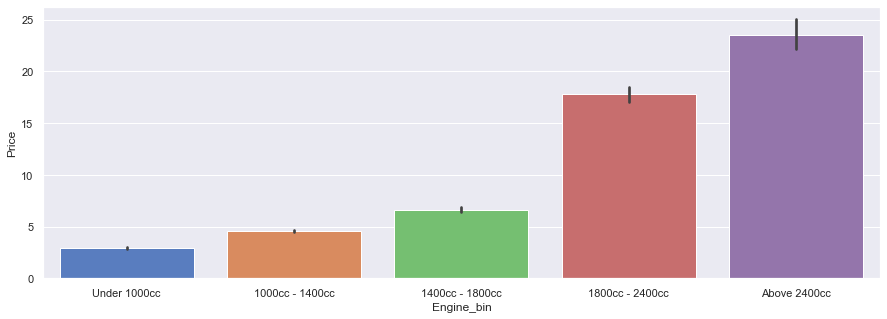

In [68]:
plt.figure(figsize=(15,5))
ax = sns.barplot(x='Engine_bin', y='Price', data=cars, palette='muted') 


<font color=darkorange>
<font size =4.5>
1.9.2 Data Preparation for Modeling : Binning of Kilometers Driven column

In [69]:
# Kilometers driven binned for better categorization
binned_km = pd.cut(cars['Kilometers_Driven'], [-np.inf, 10000, 20000, 30000,40000,50000, 100000, np.inf])
binned_km

0       (50000.0, 100000.0]
1        (40000.0, 50000.0]
2        (40000.0, 50000.0]
3       (50000.0, 100000.0]
4        (40000.0, 50000.0]
               ...         
7248    (50000.0, 100000.0]
7249    (50000.0, 100000.0]
7250     (20000.0, 30000.0]
7251    (50000.0, 100000.0]
7252    (50000.0, 100000.0]
Name: Kilometers_Driven, Length: 7253, dtype: category
Categories (7, interval[float64]): [(-inf, 10000.0] < (10000.0, 20000.0] < (20000.0, 30000.0] < (30000.0, 40000.0] < (40000.0, 50000.0] < (50000.0, 100000.0] < (100000.0, inf]]

In [70]:
binned_km.value_counts(dropna=False)

(50000.0, 100000.0]    3303
(40000.0, 50000.0]      930
(30000.0, 40000.0]      878
(20000.0, 30000.0]      763
(100000.0, inf]         623
(10000.0, 20000.0]      522
(-inf, 10000.0]         234
Name: Kilometers_Driven, dtype: int64

In [71]:
# Assigning labels to categories
cars['Km_bin'] = pd.cut(
    cars['Kilometers_Driven'], [-np.inf, 10000, 20000, 30000,40000,50000,100000,np.inf], 
    labels = ["Less than 10K", "10k-20K", "20k-30K", "30k-40K","40k-50K","50k-100K", "More than 100K"]
)

cars['Kilometers_Driven'].value_counts(dropna=False)



60000    96
45000    86
65000    86
70000    77
50000    72
         ..
46300     1
9434      1
72921     1
33128     1
83969     1
Name: Kilometers_Driven, Length: 3660, dtype: int64

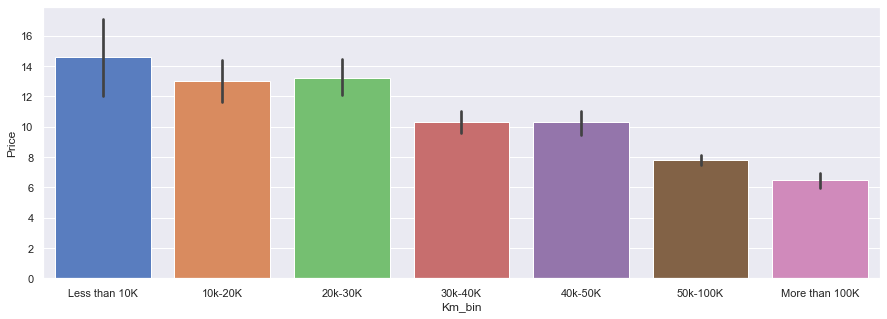

In [72]:
# Plotting binned Kilometers driven with respect to Price
plt.figure(figsize=(15,5))
ax = sns.barplot(x='Km_bin', y='Price', data=cars, palette='muted') 


<font color=darkblue>
<font size =2>
# Observations : Less than 10k miles have highest value. Price decreases as Kilometers Driven on car increases.


<font color=darkcyan>
<font size =5>
1.10 Missing value Treatment

<font color=darkorange>
<font size =4.5>
1.10.1 Check for missing values

In [73]:
# looking at which columns have the most missing values
cars.isnull().sum().sort_values(ascending=False)

New_Price            6247
Price                1234
Power                 175
Power_log             175
Seats                  53
Engine_bin             46
Engine                 46
Mileage                 2
Transmission            0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Km_bin                  0
Owner_Type              0
Make                    0
Model                   0
Location                0
dtype: int64

<font color=darkblue>
<font size =2>
# Observations 


<font color = 'darkblue'>

1. As we can see in column New_Price almost 86% of values are missing , hence this coulmn cannot be included in our analysis to get reliable information. So we are going to drop the column New_Price.
2. As Price is our target variable, missing value rows in Price column can be removed from our analysis.


<font color=darkorange>
<font size =4.5>
1.10.2  Dropping New_Price

In [74]:
# Dropping the New_Price column.
cars.drop(["New_Price"], axis=1, inplace=True)
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Location           7253 non-null   category
 1   Year               7253 non-null   int64   
 2   Kilometers_Driven  7253 non-null   int64   
 3   Fuel_Type          7253 non-null   category
 4   Transmission       7253 non-null   category
 5   Owner_Type         7253 non-null   category
 6   Mileage            7251 non-null   float64 
 7   Engine             7207 non-null   float64 
 8   Power              7078 non-null   float64 
 9   Seats              7200 non-null   float64 
 10  Price              6019 non-null   float64 
 11  Make               7253 non-null   object  
 12  Model              7253 non-null   object  
 13  Power_log          7078 non-null   float64 
 14  Engine_bin         7207 non-null   category
 15  Km_bin             7253 non-null   category
dtypes: cat

<font color=darkblue>
<font size =2>
# Observations : 
We now have a total of 15 columns.

<font color=darkorange>
<font size =4.5>
1.10.3 Missing value Treatment : Dropping missing value rows in Target variable Price

In [75]:
cars.dropna(subset=["Price"], inplace=True)

In [76]:
cars.isnull().sum().sort_values(ascending=False)

Power_log            143
Power                143
Seats                 42
Engine_bin            36
Engine                36
Mileage                2
Km_bin                 0
Model                  0
Make                   0
Price                  0
Owner_Type             0
Transmission           0
Fuel_Type              0
Kilometers_Driven      0
Year                   0
Location               0
dtype: int64

<font color=darkblue>
<font size =2>
# Observations : 
Now we need to deal with missing values in Power, Seats, Engine and Mileage column

<font color=darkorange>
<font size =4.5>
1.10.4 Missing value Treatment : Replacing missing values with median

In [281]:
cars_median = cars.copy()

In [267]:
#instead of dropping the rows, lets replace the missing values with median value. 
cars_median.median()

Year                  2014.00
Kilometers_Driven    53000.00
Mileage                 18.16
Engine                1493.00
Power                   98.60
Seats                    5.00
Price                    5.65
dtype: float64

In [284]:
# replace the missing values with median value.

cars_median['Power_log'] = cars_median['Power_log'].fillna(cars_median['Power_log'].mean())
cars_median['Power'] = cars_median['Power'].fillna(cars_median['Power'].mean())
cars_median['Seats'] = cars_median['Seats'].fillna(cars_median['Seats'].mean())
cars_median['Engine'] = cars_median['Engine'].fillna(cars_median['Engine'].mean())
cars_median['Engine_bin'] = cars_median['Engine_bin'].fillna(cars_median['Engine_bin'].mean())
cars_median['Mileage'] = cars_median['Mileage'].fillna(cars_median['Mileage'].mean())
cars_median.isnull().sum().sort_values(ascending=False)

TypeError: Categorical cannot perform the operation mean

In [269]:
cars_median.dropna(subset=["Engine_bin"], inplace=True)

<font color=darkorange>
<font size =4.5>
1.10.7 Missing value Treatment : Deleting missing values

In [218]:
cars_delete_missing_value = cars.copy()

In [219]:
cars_delete_missing_value.drop(["Power_log"], axis=1, inplace=True)

In [220]:
 # columns with missing vales
cars_delete_missing_value.isnull().sum().sort_values(ascending=False)

Power                143
Seats                 42
Engine_bin            36
Engine                36
Mileage                2
Km_bin                 0
Model                  0
Make                   0
Price                  0
Owner_Type             0
Transmission           0
Fuel_Type              0
Kilometers_Driven      0
Year                   0
Location               0
dtype: int64

In [222]:
cars_delete_missing_value.dropna(subset=["Power"], inplace=True)

In [223]:
cars_delete_missing_value.dropna(subset=["Seats"], inplace=True)

In [224]:
cars_delete_missing_value.dropna(subset=["Mileage"], inplace=True)

In [225]:
# Check missing values after deleting rows with missing values
cars_delete_missing_value.isnull().sum().sort_values(ascending=False)

Km_bin               0
Engine_bin           0
Model                0
Make                 0
Price                0
Seats                0
Power                0
Engine               0
Mileage              0
Owner_Type           0
Transmission         0
Fuel_Type            0
Kilometers_Driven    0
Year                 0
Location             0
dtype: int64

In [226]:
num_missing = cars.isnull().sum(axis=1)
num_missing.value_counts()

0    5872
2     103
5      36
3       4
1       4
dtype: int64

In [227]:
for n in num_missing.value_counts().sort_index().index:
    if n > 0:
        print(f'For the rows with exactly {n} missing values, NAs are found in:')
        n_miss_per_col = cars[num_missing == n].isnull().sum()
        print(n_miss_per_col[n_miss_per_col > 0])
        print('\n\n')
        

For the rows with exactly 1 missing values, NAs are found in:
Mileage    2
Seats      2
dtype: int64



For the rows with exactly 2 missing values, NAs are found in:
Power        103
Power_log    103
dtype: int64



For the rows with exactly 3 missing values, NAs are found in:
Power        4
Seats        4
Power_log    4
dtype: int64



For the rows with exactly 5 missing values, NAs are found in:
Engine        36
Power         36
Seats         36
Power_log     36
Engine_bin    36
dtype: int64





<font color=darkcyan>
<font size =5>
1.11 Outlier Treatment

In [228]:
cars_outlier1 = cars_median.copy()

In [229]:
quartiles = np.quantile(cars_outlier1['Kilometers_Driven'][cars_outlier1['Kilometers_Driven'].notnull()], [.25, .75])
power_4iqr = 4 * (quartiles[1] - quartiles[0])
print(f'Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 4*IQR = {power_4iqr}')
outlier_km = cars_outlier1.loc[np.abs(cars_outlier1['Kilometers_Driven'] - cars_outlier1['Kilometers_Driven'].median()) > power_4iqr, 'Kilometers_Driven']
outlier_km

Q1 = 33965.5, Q3 = 73000.0, 4*IQR = 156138.0


29       262000
77       230000
181      216000
340      775000
358      620000
838      215000
1068     225000
1101     248000
1442     231673
1528     299322
1766     220000
1846     255000
1860     720000
1975     282000
2267     215750
2328    6500000
2346     234000
2823     480000
2988     240000
3092     480000
3649     300000
3713     232000
3894     250000
4491     445000
4719     250000
4792     242000
5647     227000
5800     210000
5834     250000
Name: Kilometers_Driven, dtype: int64

In [230]:
# dropping these rows
cars_outlier1.drop(outlier_km.index, axis=0, inplace=True)

/Users/swetanaidu/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


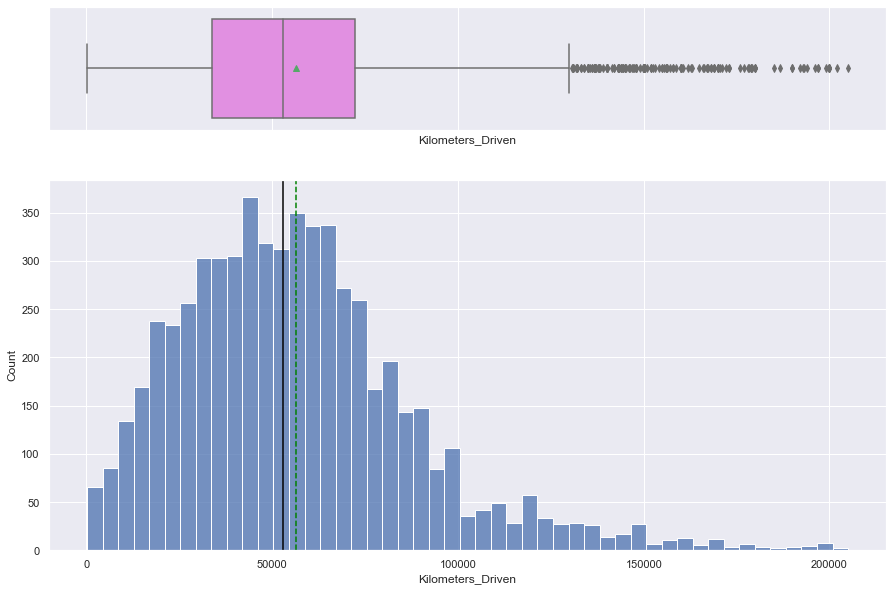

In [231]:
histogram_boxplot(cars_outlier1["Kilometers_Driven"])

<font color=darkcyan>
<font size =5>
1.12 Model Building 1 (Dropping all missing values)

In [232]:
ind_vars = cars_delete_missing_value.drop(["Price"], axis=1)
dep_var = cars_delete_missing_value[["Price"]]

In [233]:
ind_vars.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Make,Model,Engine_bin,Km_bin
0,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,Maruti,Wagon,Under 1000cc,50k-100K
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,Hyundai,Creta,1400cc - 1800cc,40k-50K
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,Honda,Jazz,1000cc - 1400cc,40k-50K
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,Maruti,Ertiga,1000cc - 1400cc,50k-100K
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,Audi,A4,1800cc - 2400cc,40k-50K


In [234]:
# we will create dummy variables for the categorical columns
def encode_cat_vars(x):
    x = pd.get_dummies(
        x,
        columns=x.select_dtypes(include=["object", "category"]).columns.tolist(),
        drop_first=True,
    )
    return x


ind_vars_num = encode_cat_vars(ind_vars)
ind_vars_num.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Make_Audi,Make_BMW,Make_Bentley,Make_Chevrolet,Make_Datsun,Make_Fiat,Make_Force,Make_Ford,Make_Honda,Make_Hyundai,Make_ISUZU,Make_Isuzu,Make_Jaguar,Make_Jeep,Make_Lamborghini,Make_Land,Make_Mahindra,Make_Maruti,Make_Mercedes-Benz,Make_Mini,Make_Mitsubishi,Make_Nissan,Make_Porsche,Make_Renault,Make_Skoda,Make_Tata,Make_Toyota,Make_Volkswagen,Make_Volvo,Model_3,Model_5,Model_6,Model_7,Model_800,Model_A,Model_A-Star,Model_A3,Model_A4,Model_A6,Model_A7,Model_A8,Model_Accent,Model_Accord,Model_Alto,Model_Amaze,Model_Ameo,Model_Aspire,Model_Aveo,Model_Avventura,Model_B,Model_BR-V,Model_BRV,Model_Baleno,Model_Beat,Model_Beetle,Model_Bolero,Model_Bolt,Model_Boxster,Model_Brio,Model_C-Class,Model_CLA,Model_CLS-Class,Model_CR-V,Model_Camry,Model_Captiva,Model_Captur,Model_Cayenne,Model_Cedia,Model_Celerio,Model_Ciaz,Model_City,Model_Civic,Model_Classic,Model_Clubman,Model_Compass,Model_Continental,Model_Cooper,Model_Corolla,Model_Countryman,Model_Creta,Model_CrossPolo,Model_Cruze,Model_D-MAX,Model_Duster,Model_Dzire,Model_E-Class,Model_EON,Model_EcoSport,Model_Ecosport,Model_Eeco,Model_Elantra,Model_Elite,Model_Endeavour,Model_Enjoy,Model_Ertiga,Model_Esteem,Model_Etios,Model_Evalia,Model_F,Model_Fabia,Model_Fiesta,Model_Figo,Model_Fluence,Model_Fortuner,Model_Freestyle,Model_Fusion,Model_GL-Class,Model_GLA,Model_GLC,Model_GLE,Model_GLS,Model_GO,Model_Gallardo,Model_Getz,Model_Grand,Model_Grande,Model_Hexa,Model_Ignis,Model_Ikon,Model_Indica,Model_Indigo,Model_Innova,Model_Jazz,Model_Jetta,Model_KUV,Model_KWID,Model_Koleos,Model_Lancer,Model_Laura,Model_Linea,Model_Lodgy,Model_Logan,Model_M-Class,Model_MUX,Model_Manza,Model_Micra,Model_Mobilio,Model_Montero,Model_Mustang,Model_Nano,Model_New,Model_Nexon,Model_NuvoSport,Model_Octavia,Model_Omni,Model_One,Model_Optra,Model_Outlander,Model_Pajero,Model_Panamera,Model_Passat,Model_Platinum,Model_Polo,Model_Pulse,Model_Punto,Model_Q3,Model_Q5,Model_Q7,Model_Qualis,Model_Quanto,Model_R-Class,Model_RS5,Model_Rapid,Model_Redi,Model_Renault,Model_Ritz,Model_Rover,Model_S,Model_S-Class,Model_S-Cross,Model_S60,Model_S80,Model_SL-Class,Model_SLC,Model_SLK-Class,Model_SX4,Model_Safari,Model_Sail,Model_Santa,Model_Santro,Model_Scala,Model_Scorpio,Model_Sonata,Model_Spark,Model_Ssangyong,Model_Sumo,Model_Sunny,Model_Superb,Model_Swift,Model_TT,Model_TUV,Model_Tavera,Model_Teana,Model_Terrano,Model_Thar,Model_Tiago,Model_Tigor,Model_Tiguan,Model_Tucson,Model_V40,Model_Vento,Model_Venture,Model_Verito,Model_Verna,Model_Versa,Model_Vitara,Model_WR-V,Model_WRV,Model_Wagon,Model_X-Trail,Model_X1,Model_X3,Model_X5,Model_X6,Model_XC60,Model_XC90,Model_XE,Model_XF,Model_XJ,Model_XUV300,Model_XUV500,Model_Xcent,Model_Xenon,Model_Xylo,Model_Yeti,Model_Z4,Model_Zen,Model_Zest,Model_i10,Model_i20,Model_redi-GO,Engine_bin_1000cc - 1400cc,Engine_bin_1400cc - 1800cc,Engine_bin_1800cc - 2400cc,Engine_bin_Above 2400cc,Km_bin_10k-20K,Km_bin_20k-30K,Km_bin_30k-40K,Km_bin_40k-50K,Km_bin_50k-100K,Km_bin_More than 100K
0,2010,72000,26.60,998.0,58.16,5.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,2015,41000,19.67,1582.0,126.20,5.0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,

In [235]:
ind_vars_num.shape

(5872, 265)

<font color=darkcyan>
<font size =5>

    
Split the data into train and test

In [236]:


x_train, x_test, y_train, y_test = train_test_split(
    ind_vars_num, dep_var, test_size=0.3, random_state=1
)

train 

x_train : features in train data 
y_train : target in the train data

test

x_test : features in test data 
y_test : target in the test data


In [237]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 4110
Number of rows in test data = 1762


<font color=darkcyan>
<font size =5>
    
Fitting a linear model

In [238]:
lin_reg_model1 = LinearRegression()
lin_reg_model1.fit(x_train, y_train)

LinearRegression()

In [239]:
coef_df = pd.DataFrame(
    np.append(lin_reg_model1.coef_.flatten(), lin_reg_model1.intercept_),
    index=x_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)
coef_df.head(6)

,Coefficients
Year,0.884324
Kilometers_Driven,0.000004
Mileage,0.003822
Engine,-0.003640
Power,0.083283
Seats,1.553348


<font color=darkcyan>
<font size =5>
Model performance check

In [240]:
# Adjusted R^2
def adj_r2(ind_vars, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = ind_vars.shape[0]
    k = ind_vars.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# Model performance check
def model_perf(model, inp, out):

    y_pred = model.predict(inp)
    y_act = out.values

    return pd.DataFrame(
        {
            "RMSE": np.sqrt(mean_squared_error(y_act, y_pred)),
            "MAE": mean_absolute_error(y_act, y_pred),
            "R^2": r2_score(y_act, y_pred),
            "Adjusted R^2": adj_r2(inp, y_act, y_pred),
        },
        index=[0],
    )

In [241]:
# Checking model performance on train set
print("Training Performance\n")
print(model_perf(lin_reg_model1, x_train, y_train))

Training Performance

      RMSE       MAE      R^2  Adjusted R^2
0  4.25269  2.280534  0.85973       0.85006


In [242]:
# Checking model performance on test set
print("Test Performance\n")
print(model_perf(lin_reg_model1, x_test, y_test))

Test Performance

       RMSE       MAE       R^2  Adjusted R^2
0  4.566627  2.479512  0.827538      0.796989


<font color=darkcyan>
<font size =5>
1.13 Model Building attempt 2 (Replacing missing value with median)

In [270]:
ind_vars = cars_median.drop(["Price"], axis=1)
dep_var = cars_median[["Price"]]

In [271]:
ind_vars.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Make,Model,Engine_bin
0,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,Maruti,Wagon,Under 1000cc
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,Hyundai,Creta,1400cc - 1800cc
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,Honda,Jazz,1000cc - 1400cc
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,Maruti,Ertiga,1000cc - 1400cc
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,Audi,A4,1800cc - 2400cc


In [272]:
# we will create dummy variables for the categorical columns
def encode_cat_vars(x):
    x = pd.get_dummies(
        x,
        columns=x.select_dtypes(include=["object", "category"]).columns.tolist(),
        drop_first=True,
    )
    return x


ind_vars_num = encode_cat_vars(ind_vars)
ind_vars_num.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Make_Audi,Make_BMW,Make_Bentley,Make_Chevrolet,Make_Datsun,Make_Fiat,Make_Force,Make_Ford,Make_Honda,Make_Hyundai,Make_ISUZU,Make_Isuzu,Make_Jaguar,Make_Jeep,Make_Lamborghini,Make_Land,Make_Mahindra,Make_Maruti,Make_Mercedes-Benz,Make_Mini,Make_Mitsubishi,Make_Nissan,Make_Porsche,Make_Renault,Make_Skoda,Make_Smart,Make_Tata,Make_Toyota,Make_Volkswagen,Make_Volvo,Model_1000,Model_3,Model_5,Model_6,Model_7,Model_800,Model_A,Model_A-Star,Model_A3,Model_A4,Model_A6,Model_A7,Model_A8,Model_Accent,Model_Accord,Model_Alto,Model_Amaze,Model_Ameo,Model_Aspire,Model_Aveo,Model_Avventura,Model_B,Model_BR-V,Model_BRV,Model_Baleno,Model_Beat,Model_Beetle,Model_Bolero,Model_Bolt,Model_Boxster,Model_Brio,Model_C-Class,Model_CLA,Model_CLS-Class,Model_CR-V,Model_Camry,Model_Captiva,Model_Captur,Model_Cayenne,Model_Cayman,Model_Cedia,Model_Celerio,Model_Ciaz,Model_City,Model_Civic,Model_Classic,Model_Clubman,Model_Compass,Model_Continental,Model_Cooper,Model_Corolla,Model_Countryman,Model_Creta,Model_CrossPolo,Model_Cruze,Model_D-MAX,Model_Duster,Model_Dzire,Model_E,Model_E-Class,Model_EON,Model_EcoSport,Model_Ecosport,Model_Eeco,Model_Elantra,Model_Elite,Model_Endeavour,Model_Enjoy,Model_Ertiga,Model_Esteem,Model_Estilo,Model_Etios,Model_Evalia,Model_F,Model_Fabia,Model_Fiesta,Model_Figo,Model_Fluence,Model_Fortuner,Model_Fortwo,Model_Freestyle,Model_Fusion,Model_GL-Class,Model_GLA,Model_GLC,Model_GLE,Model_GLS,Model_GO,Model_Gallardo,Model_Getz,Model_Grand,Model_Grande,Model_Hexa,Model_Ignis,Model_Ikon,Model_Indica,Model_Indigo,Model_Innova,Model_Jazz,Model_Jeep,Model_Jetta,Model_KUV,Model_KWID,Model_Koleos,Model_Lancer,Model_Laura,Model_Linea,Model_Lodgy,Model_Logan,Model_M-Class,Model_MUX,Model_Manza,Model_Micra,Model_Mobilio,Model_Montero,Model_Mustang,Model_Nano,Model_New,Model_Nexon,Model_NuvoSport,Model_Octavia,Model_Omni,Model_One,Model_Optra,Model_Outlander,Model_Pajero,Model_Panamera,Model_Passat,Model_Petra,Model_Platinum,Model_Polo,Model_Prius,Model_Pulse,Model_Punto,Model_Q3,Model_Q5,Model_Q7,Model_Qualis,Model_Quanto,Model_R-Class,Model_RS5,Model_Rapid,Model_Redi,Model_Renault,Model_Ritz,Model_Rover,Model_S,Model_S-Class,Model_S-Cross,Model_S60,Model_S80,Model_SL-Class,Model_SLC,Model_SLK-Class,Model_SX4,Model_Safari,Model_Sail,Model_Santa,Model_Santro,Model_Scala,Model_Scorpio,Model_Siena,Model_Sonata,Model_Spark,Model_Ssangyong,Model_Sumo,Model_Sunny,Model_Superb,Model_Swift,Model_TT,Model_TUV,Model_Tavera,Model_Teana,Model_Terrano,Model_Thar,Model_Tiago,Model_Tigor,Model_Tiguan,Model_Tucson,Model_V40,Model_Vento,Model_Venture,Model_Verito,Model_Verna,Model_Versa,Model_Vitara,Model_WR-V,Model_WRV,Model_Wagon,Model_X-Trail,Model_X1,Model_X3,Model_X5,Model_X6,Model_XC60,Model_XC90,Model_XE,Model_XF,Model_XJ,Model_XUV300,Model_XUV500,Model_Xcent,Model_Xenon,Model_Xylo,Model_Yeti,Model_Z4,Model_Zen,Model_Zest,Model_i10,Model_i20,Model_redi-GO,Engine_bin_1000cc - 1400cc,Engine_bin_1400cc - 1800cc,Engine_bin_1800cc - 2400cc,Engine_bin_Above 2400cc
0,2010,72000,26.60,998.0,58.16,5.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2015,41000,19.67,1582.0,126.20,5.0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,

In [273]:
ind_vars_num.shape

(5983, 269)

<font color=darkcyan>
<font size =5>

    
Split the data into train and test

In [274]:


x_train, x_test, y_train, y_test = train_test_split(
    ind_vars_num, dep_var, test_size=0.3, random_state=1
)

train 

x_train : features in train data 
y_train : target in the train data

test

x_test : features in test data 
y_test : target in the test data


In [275]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 4188
Number of rows in test data = 1795


<font color=darkcyan>
<font size =5>
    
Fitting a linear model

In [276]:
lin_reg_model = LinearRegression()
lin_reg_model.fit(x_train, y_train)

LinearRegression()

In [277]:
coef_df = pd.DataFrame(
    np.append(lin_reg_model.coef_.flatten(), lin_reg_model.intercept_),
    index=x_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)
coef_df

,Coefficients
Year,1.019960
Kilometers_Driven,-0.000019
Mileage,-0.037163
Engine,-0.003419
Power,0.078130
...,...
Engine_bin_1000cc - 1400cc,2.183502
Engine_bin_1400cc - 1800cc,2.016232
Engine_bin_1800cc - 2400cc,4.422860
Engine_bin_Above 2400cc,6.293944


<font color=darkcyan>
<font size =5>
Model performance check

In [278]:
# Adjusted R^2
def adj_r2(ind_vars, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = ind_vars.shape[0]
    k = ind_vars.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# Model performance check
def model_perf(model, inp, out):

    y_pred = model.predict(inp)
    y_act = out.values

    return pd.DataFrame(
        {
            "RMSE": np.sqrt(mean_squared_error(y_act, y_pred)),
            "MAE": mean_absolute_error(y_act, y_pred),
            "R^2": r2_score(y_act, y_pred),
            "Adjusted R^2": adj_r2(inp, y_act, y_pred),
        },
        index=[0],
    )

In [279]:
# Checking model performance on train set
print("Training Performance\n")
print(model_perf(lin_reg_model, x_train, y_train))

Training Performance

       RMSE       MAE       R^2  Adjusted R^2
0  4.239449  2.235657  0.858603      0.848895


In [280]:
# Checking model performance on test set
print("Test Performance\n")
print(model_perf(lin_reg_model, x_test, y_test))

Test Performance

       RMSE       MAE       R^2  Adjusted R^2
0  5.730062  2.556835  0.729583      0.681883


<font color=darkcyan>
<font size =5>
1.14 Model Building attempt 3 (Outlier treatment)

In [254]:
ind_vars = cars_outlier1.drop(["Price"], axis=1)
dep_var = cars_outlier1[["Price"]]

In [255]:
ind_vars.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Make,Model,Engine_bin,Km_bin
0,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,Maruti,Wagon,Under 1000cc,50k-100K
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,Hyundai,Creta,1400cc - 1800cc,40k-50K
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,Honda,Jazz,1000cc - 1400cc,40k-50K
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,Maruti,Ertiga,1000cc - 1400cc,50k-100K
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,Audi,A4,1800cc - 2400cc,40k-50K


In [256]:
# we will create dummy variables for the categorical columns
def encode_cat_vars(x):
    x = pd.get_dummies(
        x,
        columns=x.select_dtypes(include=["object", "category"]).columns.tolist(),
        drop_first=True,
    )
    return x


ind_vars_num = encode_cat_vars(ind_vars)
ind_vars_num.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Make_Audi,Make_BMW,Make_Bentley,Make_Chevrolet,Make_Datsun,Make_Fiat,Make_Force,Make_Ford,Make_Honda,Make_Hyundai,Make_ISUZU,Make_Isuzu,Make_Jaguar,Make_Jeep,Make_Lamborghini,Make_Land,Make_Mahindra,Make_Maruti,Make_Mercedes-Benz,Make_Mini,Make_Mitsubishi,Make_Nissan,Make_Porsche,Make_Renault,Make_Skoda,Make_Smart,Make_Tata,Make_Toyota,Make_Volkswagen,Make_Volvo,Model_1000,Model_3,Model_5,Model_6,Model_7,Model_800,Model_A,Model_A-Star,Model_A3,Model_A4,Model_A6,Model_A7,Model_A8,Model_Accent,Model_Accord,Model_Alto,Model_Amaze,Model_Ameo,Model_Aspire,Model_Aveo,Model_Avventura,Model_B,Model_BR-V,Model_BRV,Model_Baleno,Model_Beat,Model_Beetle,Model_Bolero,Model_Bolt,Model_Boxster,Model_Brio,Model_C-Class,Model_CLA,Model_CLS-Class,Model_CR-V,Model_Camry,Model_Captiva,Model_Captur,Model_Cayenne,Model_Cayman,Model_Cedia,Model_Celerio,Model_Ciaz,Model_City,Model_Civic,Model_Classic,Model_Clubman,Model_Compass,Model_Continental,Model_Cooper,Model_Corolla,Model_Countryman,Model_Creta,Model_CrossPolo,Model_Cruze,Model_D-MAX,Model_Duster,Model_Dzire,Model_E,Model_E-Class,Model_EON,Model_EcoSport,Model_Ecosport,Model_Eeco,Model_Elantra,Model_Elite,Model_Endeavour,Model_Enjoy,Model_Ertiga,Model_Esteem,Model_Estilo,Model_Etios,Model_Evalia,Model_F,Model_Fabia,Model_Fiesta,Model_Figo,Model_Fluence,Model_Fortuner,Model_Fortwo,Model_Freestyle,Model_Fusion,Model_GL-Class,Model_GLA,Model_GLC,Model_GLE,Model_GLS,Model_GO,Model_Gallardo,Model_Getz,Model_Grand,Model_Grande,Model_Hexa,Model_Ignis,Model_Ikon,Model_Indica,Model_Indigo,Model_Innova,Model_Jazz,Model_Jeep,Model_Jetta,Model_KUV,Model_KWID,Model_Koleos,Model_Lancer,Model_Laura,Model_Linea,Model_Lodgy,Model_Logan,Model_M-Class,Model_MUX,Model_Manza,Model_Micra,Model_Mobilio,Model_Montero,Model_Mustang,Model_Nano,Model_New,Model_Nexon,Model_NuvoSport,Model_Octavia,Model_Omni,Model_One,Model_Optra,Model_Outlander,Model_Pajero,Model_Panamera,Model_Passat,Model_Petra,Model_Platinum,Model_Polo,Model_Prius,Model_Pulse,Model_Punto,Model_Q3,Model_Q5,Model_Q7,Model_Qualis,Model_Quanto,Model_R-Class,Model_RS5,Model_Rapid,Model_Redi,Model_Renault,Model_Ritz,Model_Rover,Model_S,Model_S-Class,Model_S-Cross,Model_S60,Model_S80,Model_SL-Class,Model_SLC,Model_SLK-Class,Model_SX4,Model_Safari,Model_Sail,Model_Santa,Model_Santro,Model_Scala,Model_Scorpio,Model_Siena,Model_Sonata,Model_Spark,Model_Ssangyong,Model_Sumo,Model_Sunny,Model_Superb,Model_Swift,Model_TT,Model_TUV,Model_Tavera,Model_Teana,Model_Terrano,Model_Thar,Model_Tiago,Model_Tigor,Model_Tiguan,Model_Tucson,Model_V40,Model_Vento,Model_Venture,Model_Verito,Model_Verna,Model_Versa,Model_Vitara,Model_WR-V,Model_WRV,Model_Wagon,Model_X-Trail,Model_X1,Model_X3,Model_X5,Model_X6,Model_XC60,Model_XC90,Model_XE,Model_XF,Model_XJ,Model_XUV300,Model_XUV500,Model_Xcent,Model_Xenon,Model_Xylo,Model_Yeti,Model_Z4,Model_Zen,Model_Zest,Model_i10,Model_i20,Model_redi-GO,Engine_bin_1000cc - 1400cc,Engine_bin_1400cc - 1800cc,Engine_bin_1800cc - 2400cc,Engine_bin_Above 2400cc,Km_bin_10k-20K,Km_bin_20k-30K,Km_bin_30k-40K,Km_bin_40k-50K,Km_bin_50k-100K,Km_bin_More than 100K
0,2010,72000,26.60,998.0,58.16,5.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [257]:
ind_vars_num.shape

(5954, 275)

<font color=darkcyan>
<font size =5>

    
Split the data into train and test

In [258]:


x_train, x_test, y_train, y_test = train_test_split(
    ind_vars_num, dep_var, test_size=0.3, random_state=1
)

train 

x_train : features in train data 
y_train : target in the train data

test

x_test : features in test data 
y_test : target in the test data


In [259]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 4167
Number of rows in test data = 1787


<font color=darkcyan>
<font size =5>
    
Fitting a linear model

In [260]:
lin_reg_model = LinearRegression()
lin_reg_model.fit(x_train, y_train)

LinearRegression()

In [261]:
coef_df = pd.DataFrame(
    np.append(lin_reg_model.coef_.flatten(), lin_reg_model.intercept_),
    index=x_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)
coef_df.head(6)

,Coefficients
Year,0.827147
Kilometers_Driven,-0.000014
Mileage,-0.035419
Engine,-0.001518
Power,0.075256
Seats,1.105927


<font color=darkblue>
<font size =3>
# Observations 

<font color = 'darkblue'>

1. Coefficients of Year,Power and Seats are positive.
    Increase in these values will have positive effect on Price of used car. Price of the car will increase with increase in these columns
2. Coefficients of Kilometers_Driven are negative.
    Increase in this values will have negative effect on Price of used car. Price of the car will decrease with increase in this columns
3. Year of manufacturing has a strong relationship with Price.


In [262]:
for idx, col_name in enumerate(x_train.columns):
    print("The coefficient for {} is {}".format(col_name, lin_reg_model.coef_[0][idx]))

The coefficient for Year is 0.8271469002833858
The coefficient for Kilometers_Driven is -1.4392622956923209e-05
The coefficient for Mileage is -0.03541892958348023
The coefficient for Engine is -0.0015182306138748491
The coefficient for Power is 0.0752561097111217
The coefficient for Seats is 1.1059272696823566
The coefficient for Location_Bangalore is 1.9380896105350445
The coefficient for Location_Chennai is 0.8985195163154818
The coefficient for Location_Coimbatore is 1.5678665098949613
The coefficient for Location_Delhi is -0.5734659843013201
The coefficient for Location_Hyderabad is 1.355373883900628
The coefficient for Location_Jaipur is 0.5499731359490208
The coefficient for Location_Kochi is -0.05443451859771142
The coefficient for Location_Kolkata is -1.464228713974553
The coefficient for Location_Mumbai is -0.694771194171306
The coefficient for Location_Pune is 0.39799887448024496
The coefficient for Fuel_Type_Diesel is 1.2759287445522938
The coefficient for Fuel_Type_Electri

<font color=darkcyan>
<font size =5>
Model performance check

In [263]:
# Adjusted R^2
def adj_r2(ind_vars, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = ind_vars.shape[0]
    k = ind_vars.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# Model performance check
def model_perf(model, inp, out):

    y_pred = model.predict(inp)
    y_act = out.values

    return pd.DataFrame(
        {
            "RMSE": np.sqrt(mean_squared_error(y_act, y_pred)),
            "MAE": mean_absolute_error(y_act, y_pred),
            "R^2": r2_score(y_act, y_pred),
            "Adjusted R^2": adj_r2(inp, y_act, y_pred),
        },
        index=[0],
    )

In [264]:
# Checking model performance on train set
print("Training Performance\n")
print(model_perf(lin_reg_model, x_train, y_train))

Training Performance

       RMSE       MAE       R^2  Adjusted R^2
0  4.155396  2.199428  0.865469       0.85596


In [265]:
# Checking model performance on test set
print("Test Performance\n")
print(model_perf(lin_reg_model, x_test, y_test))

Test Performance

      RMSE       MAE       R^2  Adjusted R^2
0  4.69412  2.549395  0.814074      0.780236


<font color=darkcyan>
<font size =5>
1.15 Model performance evaluation

<font color = 'black'>

1. Building model using three different approaches of data pre-processing and analyzing their performance, we can see that
    
    
<font color=darkcyan>
<font size =2.5> a) Model 1 Test Performance

       RMSE       MAE       R^2  Adjusted R^2
    4.566627  2.479512  0.827538      0.796989
    
    
 b) Model 2 Test Performance

      RMSE       MAE      R^2  Adjusted R^2
    4.53536  2.442339  0.82679      0.795657
    
    
 c) Model 3 Test Performance

       RMSE      MAE       R^2  Adjusted R^2
    4.376255  2.48753  0.830595      0.799966
    
    
    
    
<font color=black>
<font size =2.5>2.From the above data we can see that Model 3 has slightly more R^2 and Adjusted R^2 than other models.
Model 3 uses outlier treatment with missing values replaced with median instead of dropping the missing values.

<font color=darkcyan>
<font size =5>
1.16 Conclusion
    

<font color = 'darkcyan'>


    
    
1. Mumbai has highest number of used car sales and second highest city in used car sales is Hyderabad, followed by Chennai and Pune.
2. Ahmedabad and Banglore has seen the least used car sales.
3. The most used car sold are with manufacturing year 2011 to 2018. With 2015 manufactured cars being the most sold. Hence we can say cars 3-8 years old are most popular in resale.
4. Cars older than 2009 are not sold much. Resale car buyers donot prefer such old cars.
5. Cars newer than 2019 also have low resale, possibly as there is not much price difference in new car prices and those a year old.
6. Diesel cars have more sales than Petrol cars.
7. Manual cars have more used car sales as automatic cars are expensive
8. First owner cars are more preferred in used car sales
9. Though most used cars are being sold in Mumbai, Coimbatore and Banglore has most expensive cars being sold
10. Maruti and Hyundai are the top selling brands in most cities followed by Honda and Toyota in some places.
11.  Used car sales per city by Make are as follows
    
    a)Ahmedabad, Chennai,Coimbatore, Hyderabad , Jaipur and Pune: Maruti and Hyundai are most popular.
    
    b)Mumbai,Kochi and Kolkata : Maruti, Hyundai and Honda
    
    c)Banglore : Hyundai
    
    d)Delhi : Maruti, Hyundai, Honda and Toyota
    
    
12. Mostly Manual cars are more popular but coimbatore, Mumbai and Hyderabad also see high demand in automatic cars.
13. Jaipur and Kolkata have very low Automatic car sales.
14. Used manual cars market is highest in hyderabad.
15. Increase in Year,Power and Seats values will have positive effect on Price of used car. Price of the car will increase with increase in these columns.
16. Increase in Kilometers_Driven value will have negative effect on Price of used car. Price of the car will decrease with increase in this columns
17. Year of manufacturing has a strong relationship with Price
18. Diesel cars are mostly sold in hyderabad and coimbatore
19.Petrol cars are more popular in Mumbai and Pune

       
    
 Insights and Recommendations to business
    
1) Newer Automatic cars with less kilometers on odometer can be priced most expensive according the Make and model of car.

2) Location wise Mumbai is the biggest used car resale market. Hence targeting Mumbai we can say that Mumbai has a significant demand for both Manual and Automatic cars. The most popular Make's in Mumbai are Maruti , Hyundai and Honda. And Petrol car sales are more here.
    
3) Next highest market is Hyderabad. Here Diesel cars are more popular than petrol cars. Maruti and Hyundai are the most sold Make's here in used cars. Hyderabad also has a resonable sale of Automatic cars.

4) Ahmedabad and Banglore are worst markets for resale cars. 
    
5) Jaipur and Kolkata are worst market for automatic cars, people here mostly prefer manual cars. 

6) Prices of used cars can be determined based on most popular demand in a particular location, there by increasing profit margins.
    
    